In [1]:
import pandas as pd
import numpy as np
import warnings as wrn

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from seaborn import countplot
from matplotlib import style


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wrn.filterwarnings('ignore')

In [2]:
# Import the dataset | Start
df=pd.read_csv('Country-data.csv',sep=',',encoding='ISO-8859-1')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
## ** Check the Null in the dataset **
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<b>There are no Null Values in the dataset</b>

In [6]:
## ** Shape of the dataset **
df.shape

(167, 10)

In [7]:
#Checking for duplicate country
df.country.nunique()

167

All countries in dataset are unique

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


The gdp is expressed as per capita and exports, imports, health, inflation are expressed as percentage of the total GDP. We will convert them to "per capita", so that the varibales are in per capita scale rather than the percentage scale

In [9]:
df['exports']=df['exports']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100
df['inflation']=df['inflation']*df['gdpp']/100

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,52.2032,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,183.6410,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,718.0600,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,790.7200,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,175.6800,76.8,2.13,12200


In [11]:
# Define functions for the chart plotting | Start
df_orig=df
## ***** Function to define the creation of boxplots ***** | Start ##
def plotbox(col,n):
    if(col!='country'):
        sns.set(style="darkgrid")
        sns.set_context('talk')
        plt.figure(figsize=(50,30))
        plt.subplot(4,3,n)
        sns.boxplot(x=col,data=df,palette=("gist_earth"))
        plt.title('Figure ' + str(n) +' -  '+ col)
        plt.show()
## ***** Function to define the creation of boxplots ***** | End ##        

def plotbar(col,lx,ly,title):
    plt.figure(figsize=(20,10))
    ax = (col).plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel(ly, fontsize=16)
    ax.set_xlabel(lx, fontsize=16)
    plt.title(title)
    x_offset = -0.10
    y_offset = 0.02
    for p in ax.patches:
        b = p.get_bbox()
        val = "{:+.2f}".format(b.y1 + b.y0)        
        ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.show()
# Define functions for the chart plotting | End

<b> <center> Vizualizing Data </center> <b>

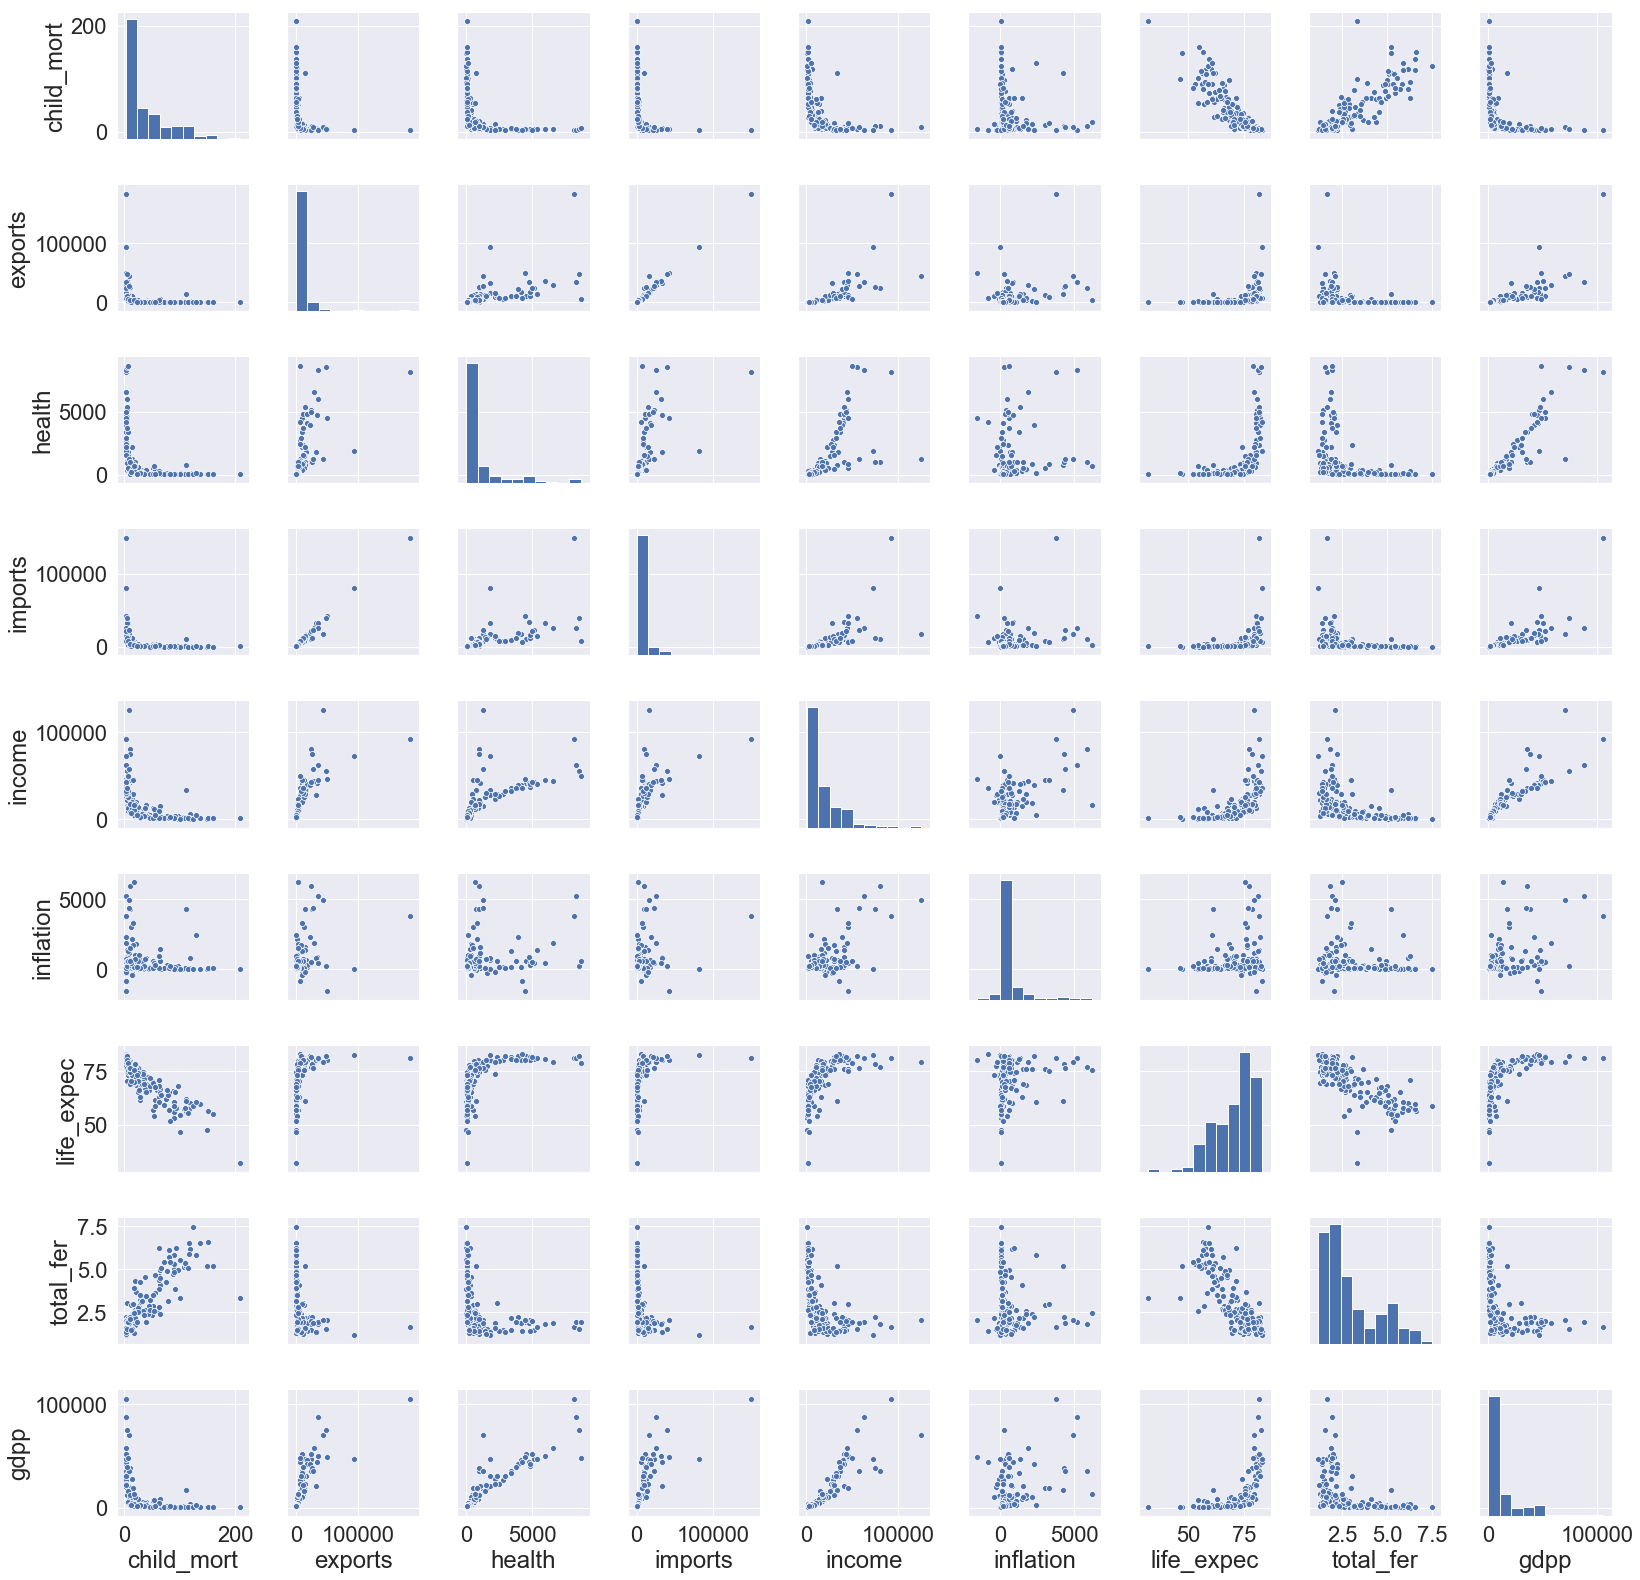

In [12]:
sns.set(font_scale=2)
sns.pairplot(df)
plt.show()

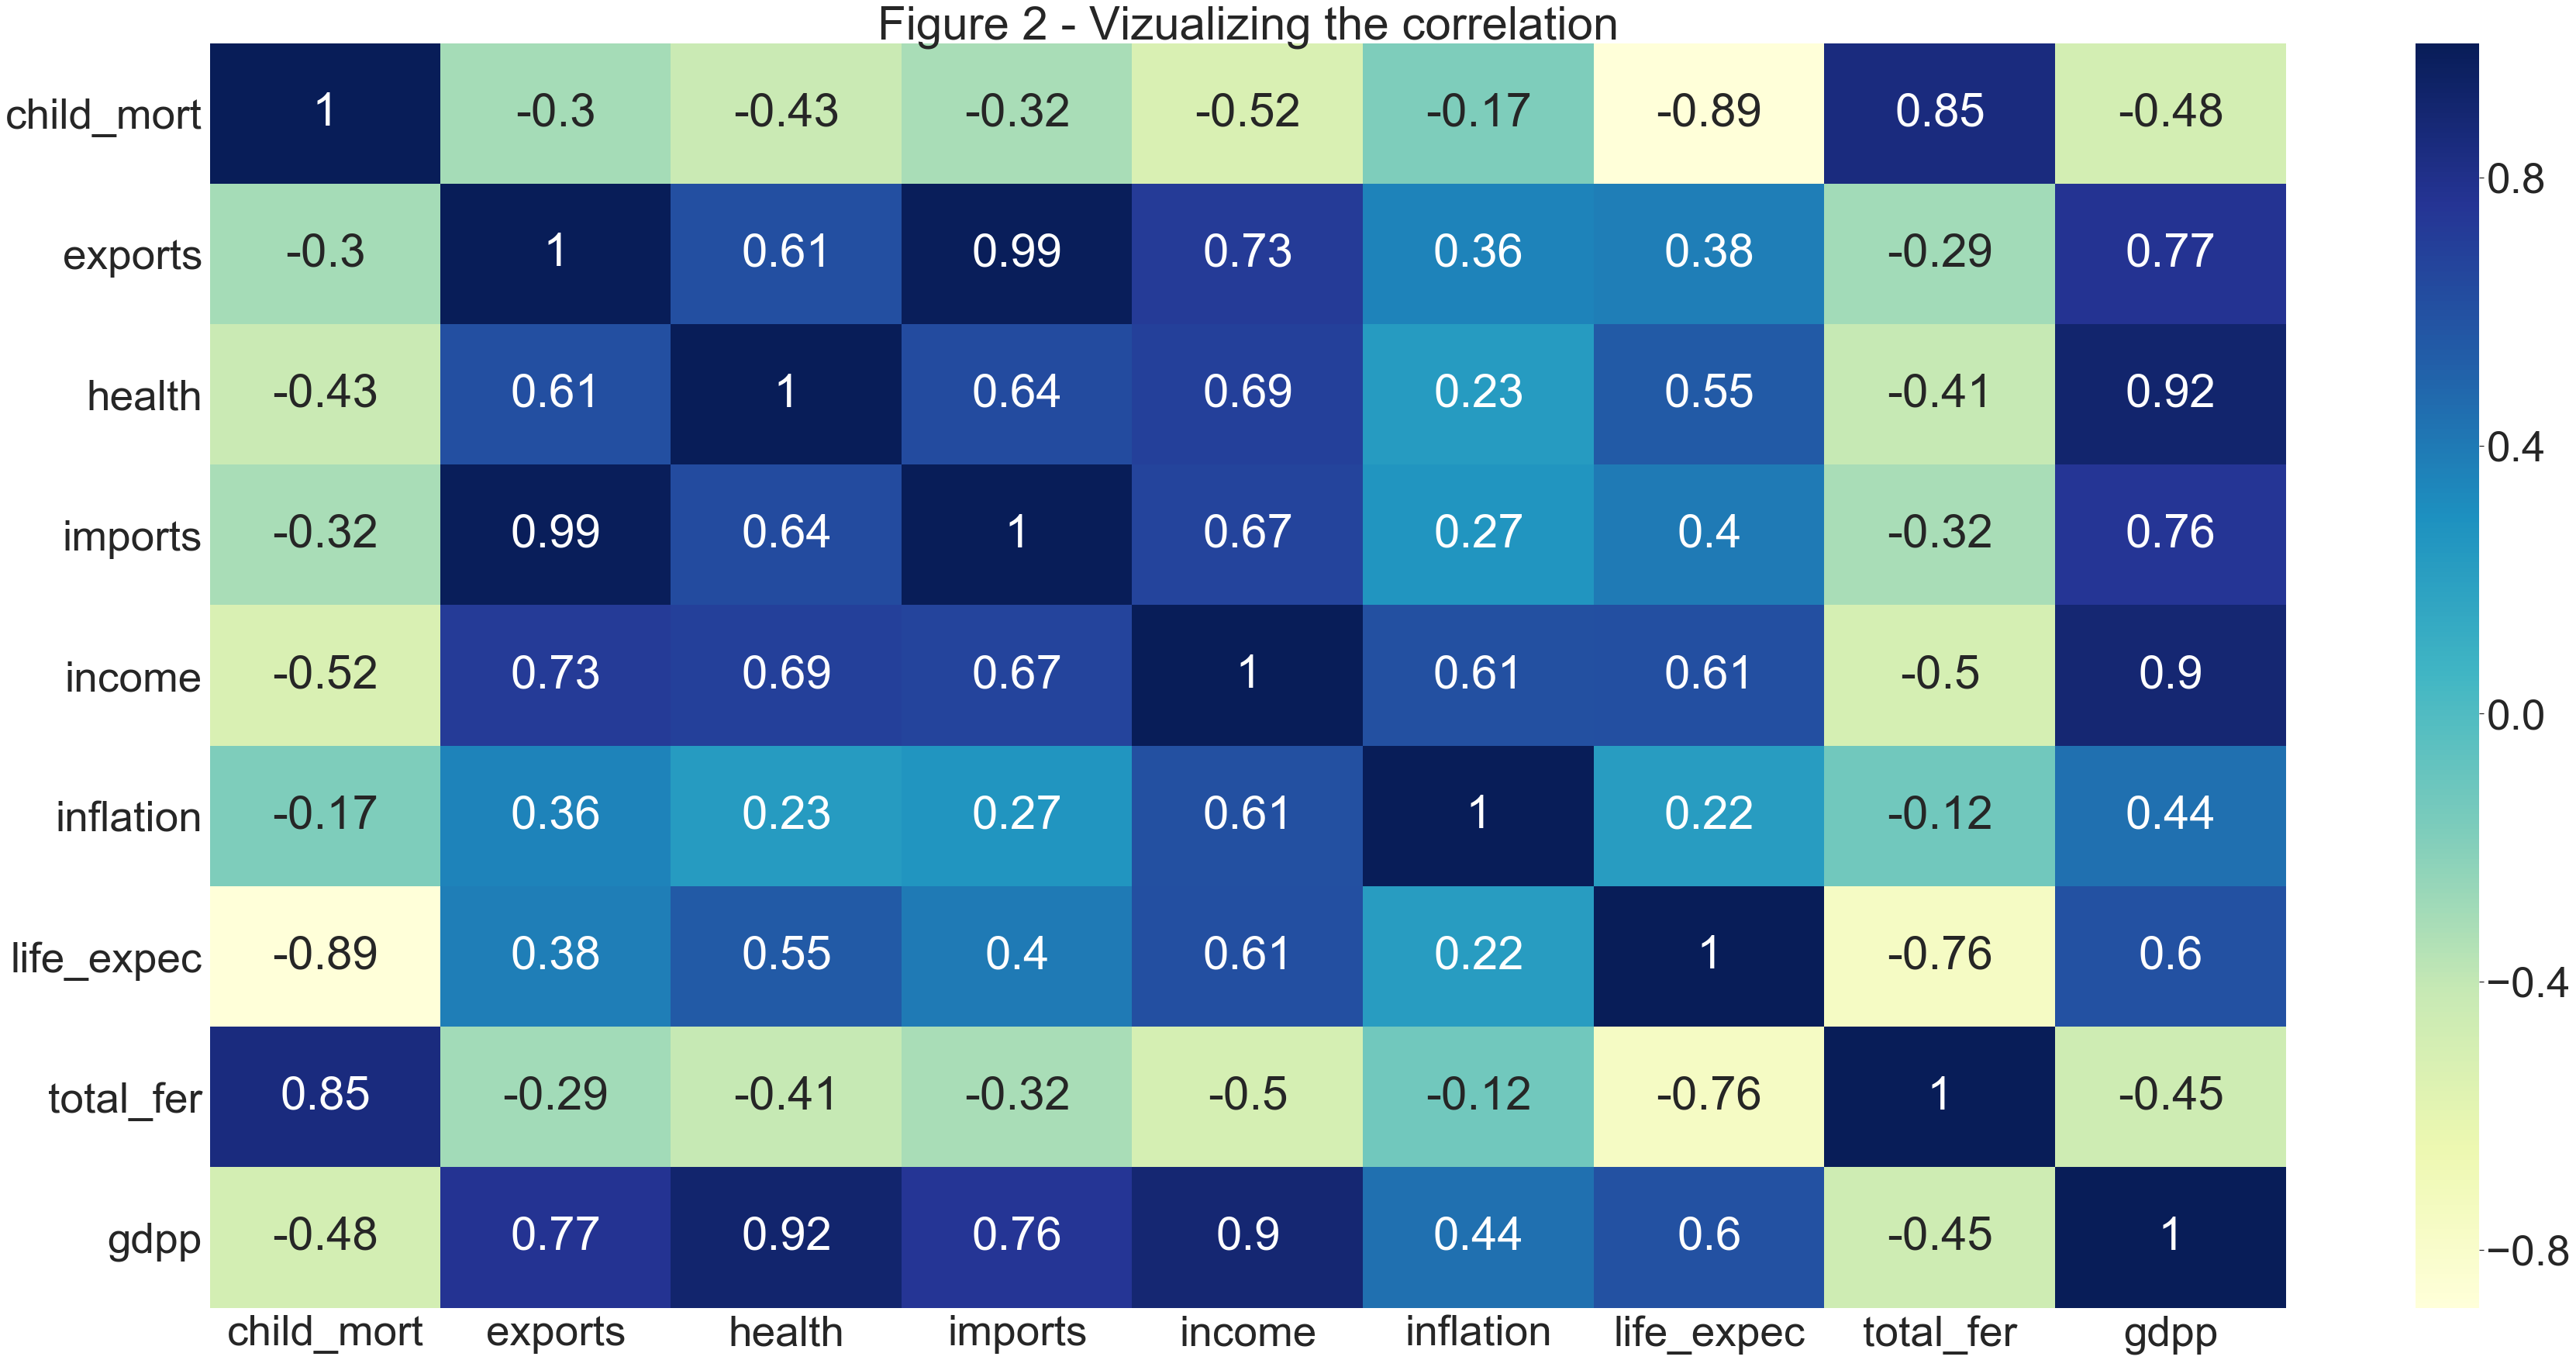

In [13]:
plt.figure(figsize=(60,30))
sns.set(style="darkgrid")
sns.set(font_scale=5)
plt.title('Figure 2 - Vizualizing the correlation')
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

<b>From the pairplot and the heatmap we can observe following:</b>
<br>
There is a high correlation between <br>
1) child_mort & total_fer <br>
2) exports & imports <br>
3) life_expec & income <br>
4) income & gdpp <br>
5) income & exports <br>

<br><b>There is a negative correlation between the following:</b>
<br> 
1) child_mort & gdpp <br>
2) total_fert & gdpp <br>
3) life_expec & total_fer <br>
4) income & total_fer <br>
5) life_expec & child_mort <br>
6) income & child_mort <br>


 #### **** <center> Vizualizing Data - Univariate Analysis | Start </center> **** 

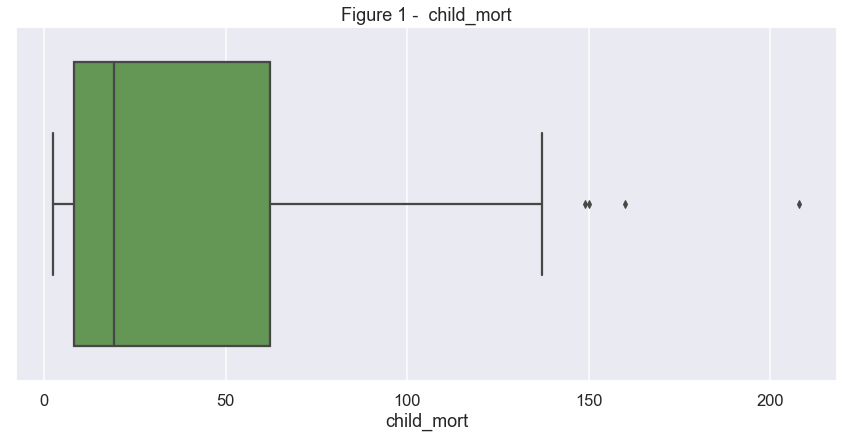

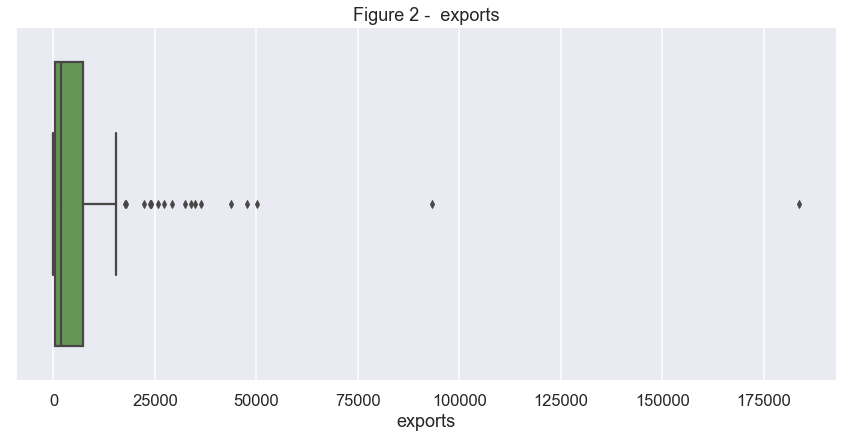

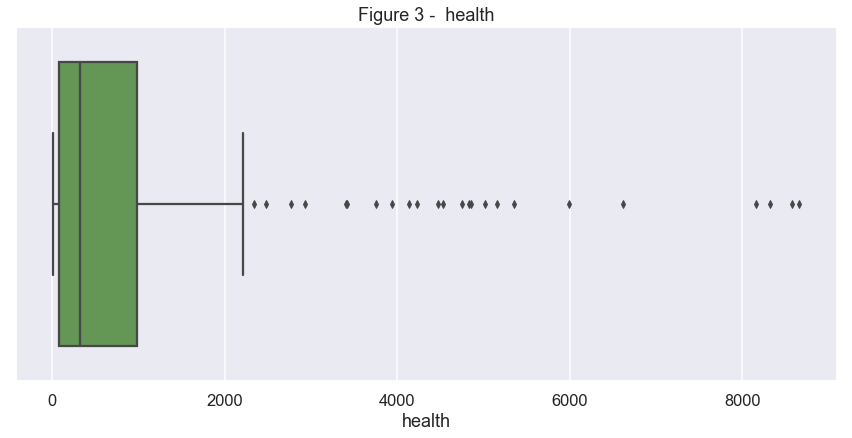

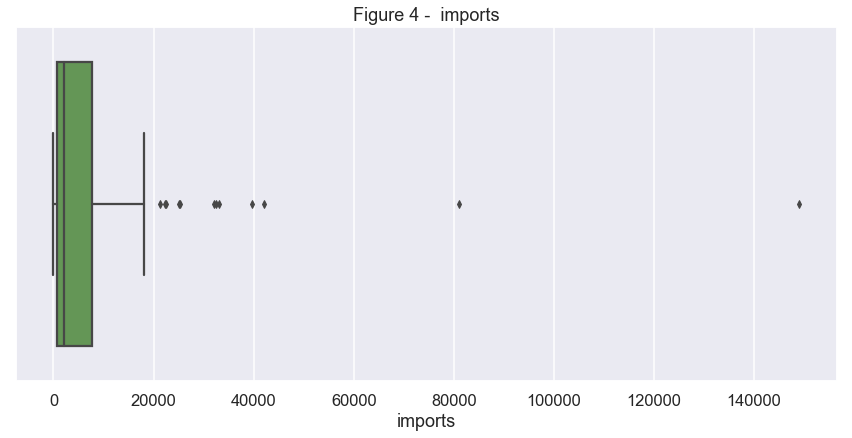

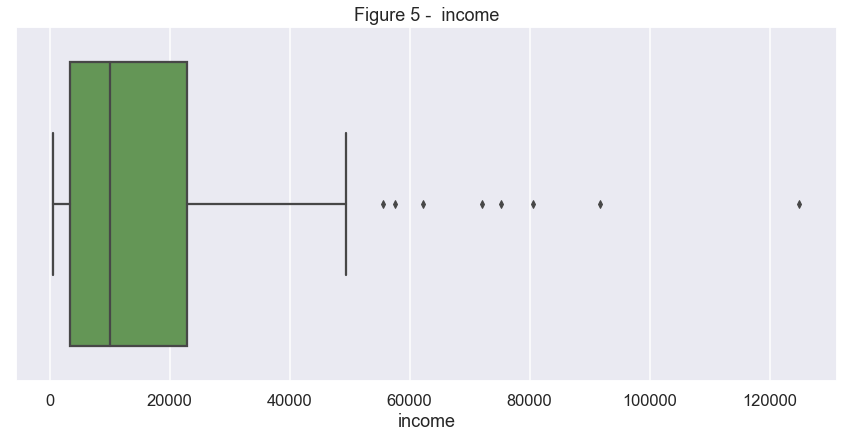

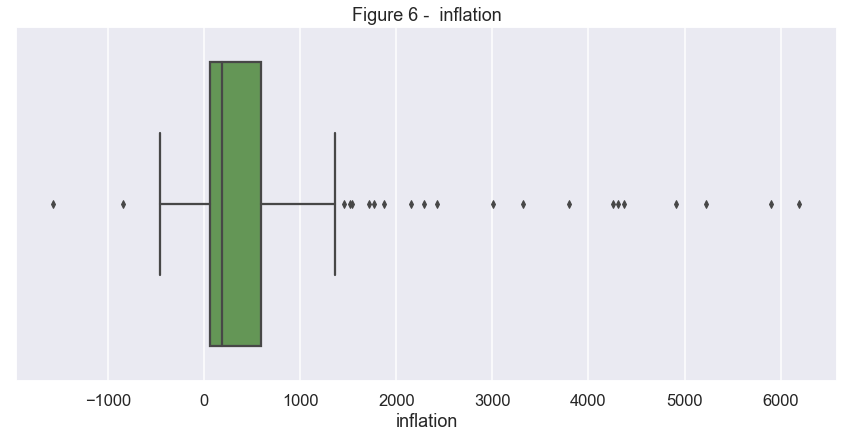

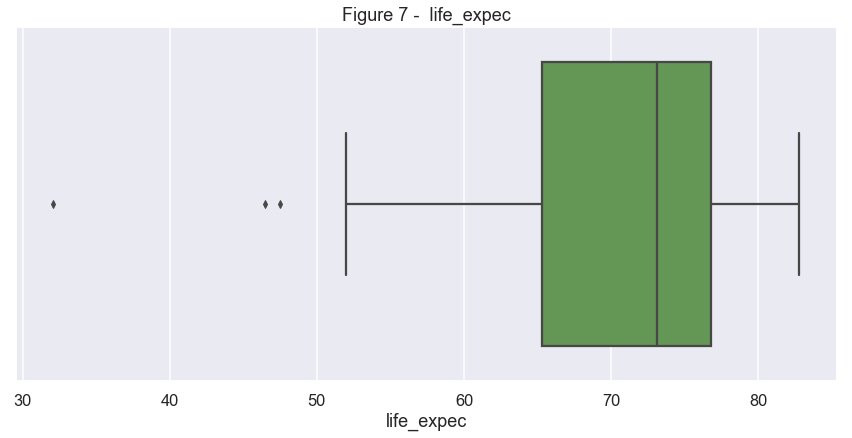

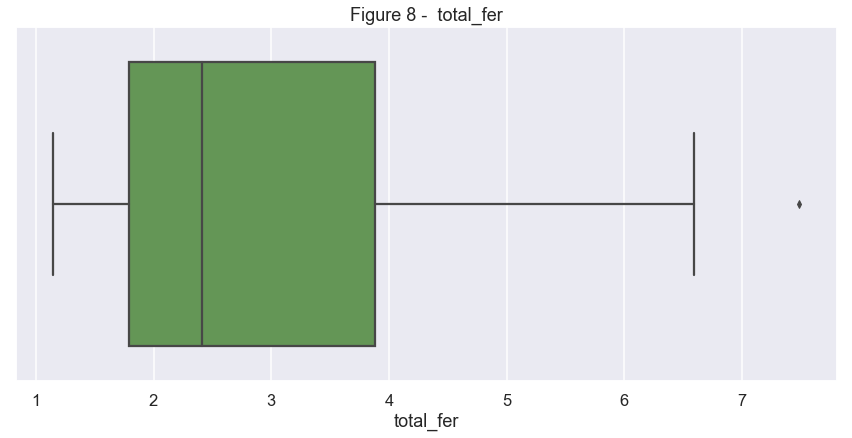

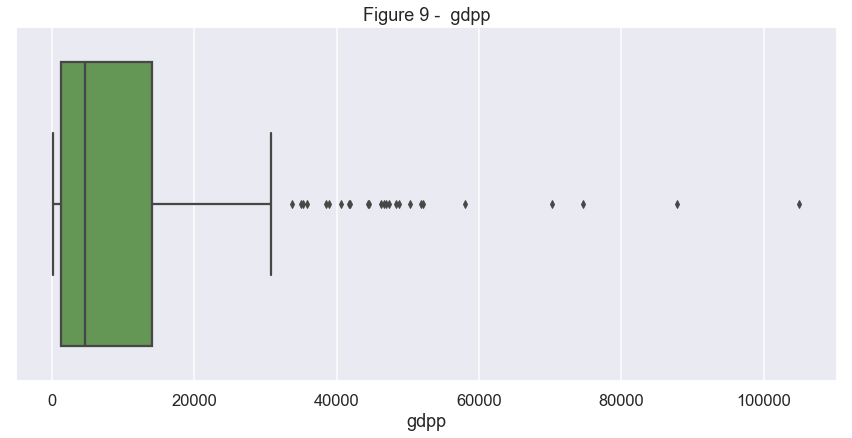

In [14]:
# Plot the box plot to check the outliers | Start 
for i in range(len(df.columns)):
    plotbox(df.columns[i],i)
    
# There are multiple box plots (figure 1 to 9) created below

The boxplots for the columns shows the presence of outliers for each of the columns such as income and gdpp, we will take handle the outliers separately


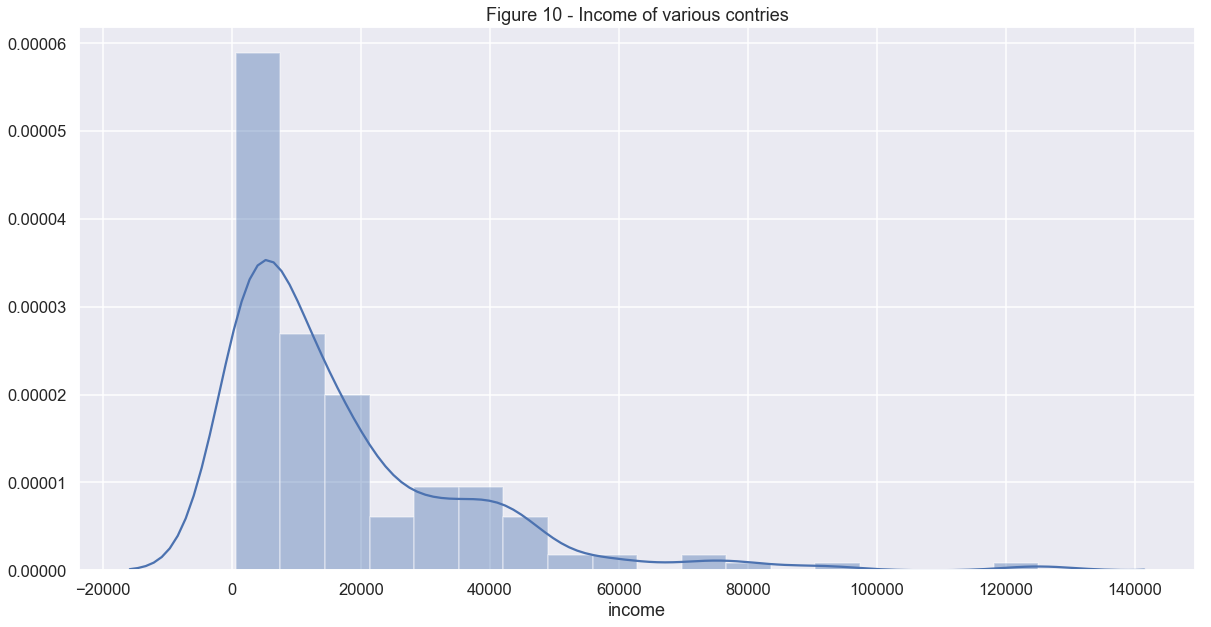

In [15]:
#### Plotting income of various countries | Start ####
plt.figure(figsize=(20,10))
sns.distplot(df.income)
plt.title("Figure 10 - Income of various contries")
plt.show()
#### Plotting income of various countries | End ####

The above graph seems as skewed to the right, which obvious from the box plots also that the incomes of countries are unevenly distributed

In [16]:
df_quant = df

In [17]:
# Checking the Quantiles | Start
Q1 = df_quant.quantile(0.25)
Q3 = df_quant.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Checking the Quantiles | End

child_mort       53.8500
exports        6830.8600
health          898.4045
imports        7079.3850
income        19445.0000
inflation       526.1800
life_expec       11.5000
total_fer         2.0850
gdpp          12720.0000
dtype: float64


In [18]:
# Drop the country column before checking outliers | Start
df_quant=df_quant.drop('country',axis=1)
# Drop the country column before checking outliers | End

In [19]:
# Checking the Outliers | Start
df_outliers = df_quant[((df_quant < (Q1 - 1.5*IQR)) | (df_quant > (Q3 + 1.5*IQR))).any(axis=1)]
len(df_outliers)
# Checking the Outliers | End

47

In [20]:
#***** Percentage of the outliers in data | Start ******
len(df_outliers)/len(df_quant)*100
#***** Percentage of the outliers in data | End ******

28.143712574850298

In [21]:
df_outliers.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
5,14.5,1946.7,834.30,1648.0,18700,2152.700,75.8,2.37,10300
7,4.8,10276.2,4530.87,10847.1,41400,602.040,82.0,1.93,51900
8,4.3,24059.7,5159.00,22418.2,43200,409.437,80.5,1.44,46900
11,8.6,14386.5,1028.79,10536.3,41100,1540.080,76.0,2.16,20700
15,4.5,33921.6,4750.80,33166.8,41100,834.720,80.0,1.86,44400


In [22]:
df_out_orig = df_quant[~((df_quant < (Q1 - 1.5*IQR)) | (df_quant > (Q3 + 1.5*IQR))).any(axis=1)]
len(df_out_orig)

120

In [23]:
# ****** CHeck the Quantiles of the income | Start *****
df.income.quantile([0.1,0.2,0.25,0.4,0.5,0.75,0.90,0.95,0.97,0.99,1.0])
# ****** CHeck the Quantiles of the income | End *****

0.10      1524.0
0.20      2548.0
0.25      3355.0
0.40      7320.0
0.50      9960.0
0.75     22800.0
0.90     41220.0
0.95     48290.0
0.97     62496.0
0.99     84374.0
1.00    125000.0
Name: income, dtype: float64

In [24]:
# ****** CHeck the Quantiles of the inflation | Start *****
df.inflation.quantile([0.1,0.2,0.25,0.4,0.5,0.75,0.90,0.95,0.97,0.99,1.0])
# ****** CHeck the Quantiles of the inflation | End *****

0.10      19.52618
0.20      49.19120
0.25      61.20500
0.40     113.69680
0.50     184.76400
0.75     587.38500
0.90    1527.67200
0.95    3226.96000
0.97    4313.26000
0.99    5452.24000
1.00    6196.50000
Name: inflation, dtype: float64

In [25]:
# ****** CHeck the Quantiles of the import | Start *****
df.imports.quantile([0.1,0.2,0.25,0.4,0.5,0.75,0.90,0.95,0.97,0.99,1.0])
# ****** CHeck the Quantiles of the import | End *****

0.10       211.0056
0.20       409.9988
0.25       640.2150
0.40      1500.2880
0.50      2045.5800
0.75      7719.6000
0.90     15034.2800
0.95     24241.5600
0.97     32507.4560
0.99     55371.3900
1.00    149100.0000
Name: imports, dtype: float64

In [26]:
# ****** CHeck the Quantiles of the gdpp | Start *****
df.gdpp.quantile([0.1,0.2,0.25,0.4,0.5,0.75,0.90,0.95,0.97,0.99,1.0])
# ****** CHeck the Quantiles of the gdpp | End *****

0.10       593.8
0.20      1146.0
0.25      1330.0
0.40      3262.0
0.50      4660.0
0.75     14050.0
0.90     41840.0
0.95     48610.0
0.97     52218.0
0.99     79088.0
1.00    105000.0
Name: gdpp, dtype: float64

In [27]:
df.exports.quantile([0.1,0.2,0.25,0.4,0.5,0.75,0.90,0.95,0.97,0.99,1.0])

0.10       110.2248
0.20       294.2680
0.25       447.1400
0.40      1166.4800
0.50      1777.4400
0.75      7278.0000
0.90     17760.6000
0.95     31385.1000
0.97     36367.6180
0.99     64794.2600
1.00    183750.0000
Name: exports, dtype: float64

In [28]:
#df_bin=df
df_bin=df
## ***** Binning of the Income Groups into Low, Medium and High groups ***** | Start
def incbinning(x):
    if x<2765:
        return "low"
    elif x>=2765 and x<=22800:
        return "medium"
    else:
        return "high"

df_bin['Income Groups'] = df_bin.income.apply(lambda x: incbinning(x))

## ***** Binning of the Income Groups into Low, Medium, Upper Medium and High groups ***** | Start


In [29]:
## ***** Binning of the Inflation into Low, Medium and High groups ***** | Start
def infbinning(x):
    if x<61.2:
        return "low"
    elif x>=61.2 and x<=587.4:  ## *** Value lying between 1st and 3rd quartile *** ##
        return "medium"
    else:
        return "high"
df_bin['Inflation Groups'] = df_bin.inflation.apply(lambda x: infbinning(x))
## ***** Binning of the Inflation into Low, Medium and High groups ***** | Stop

In [30]:
## ***** Binning of the Imports into Low, Medium and High groups ***** | Start
def impbinning(x):
    if x<640.3:
        return "low"
    elif x>=640.3 and x<=7720: ## *** Value lying between 1st and 3rd quartile *** ##
        return "medium"
    else:
        return "high"
df_bin['Import Groups'] = df_bin.imports.apply(lambda x: impbinning(x))
## ***** Binning of the Imports into Low, Medium and High groups ***** | Stop


In [31]:
## ***** Binning of the GDP into Low, Medium and High groups ***** | Start
def gdpbinning(x):
    if x<1330.0:
        return "low"
    elif x>=1330.0 and x<=14050.0: ## *** Value lying between 1st and 3rd quartile *** ##
        return "medium"
    else:
        return "high"
df_bin['gdp Groups'] = df_bin.gdpp.apply(lambda x: gdpbinning(x))
## ***** Binning of the GDP into Low, Medium and High groups ***** | Stop

In [32]:
## ***** Binning of the Exports into Low, Medium and High groups ***** | Start
def expbinning(x):
    if x<447:
        return "low"
    elif x>=447 and x<=7278: ## *** Value lying between 1st and 3rd quartile *** ##
        return "medium"
    else:
        return "high"
df_bin['Exports Groups'] = df_bin.exports.apply(lambda x: expbinning(x))
## ***** Binning of the Exports into Low, Medium and High groups ***** | Stop


<b> The bins are as follows: </b> <br>

<b><u>a. Income Group and GDP </u></b>
    1. 0 - 3355 = Low
    2. 3356 - 22800 = Medium
    3. > 22800 = High
    
    Note: The income and gdpp are very highly correlated and thus the results will be similar if we have to vizualize against the gdpp
    1. <1330 = "low"
    2. >1330 and <14050 = "medium"
    3. >14050 = "high"
    
<b><u>b. Inflation Group </u></b>
    1. 0 - 61.2 = Low
    2. 61.3 - 587.4 = Medium
    3. > 587.4 = High
<b><u>c. Imports Group </u></b>
    1. 0 - 640.3 = Low
    2. 640.4 - 7720 = Medium
    3. > 7720 = High   
<b><u>c. Exports Group </u></b>
    1. < 447 = Low
    2. >= 447 to <=7878 = Medium
    3. > 7278 = High

In [33]:
## ** Check the Unque values in the dataset *** | Start **

print(df_bin['Income Groups'].unique())
print(df_bin['Inflation Groups'].unique())
print(df_bin['Import Groups'].unique())
print(df_bin['gdp Groups'].unique())
## ** Check the Unque values in the dataset *** | End **

['low' 'medium' 'high']
['low' 'medium' 'high']
['low' 'medium' 'high']
['low' 'medium' 'high']


##  **** The below vizualisations are to have an initial view of the data. We will decide on the features to use to reach to the conclusion only after PCA ****

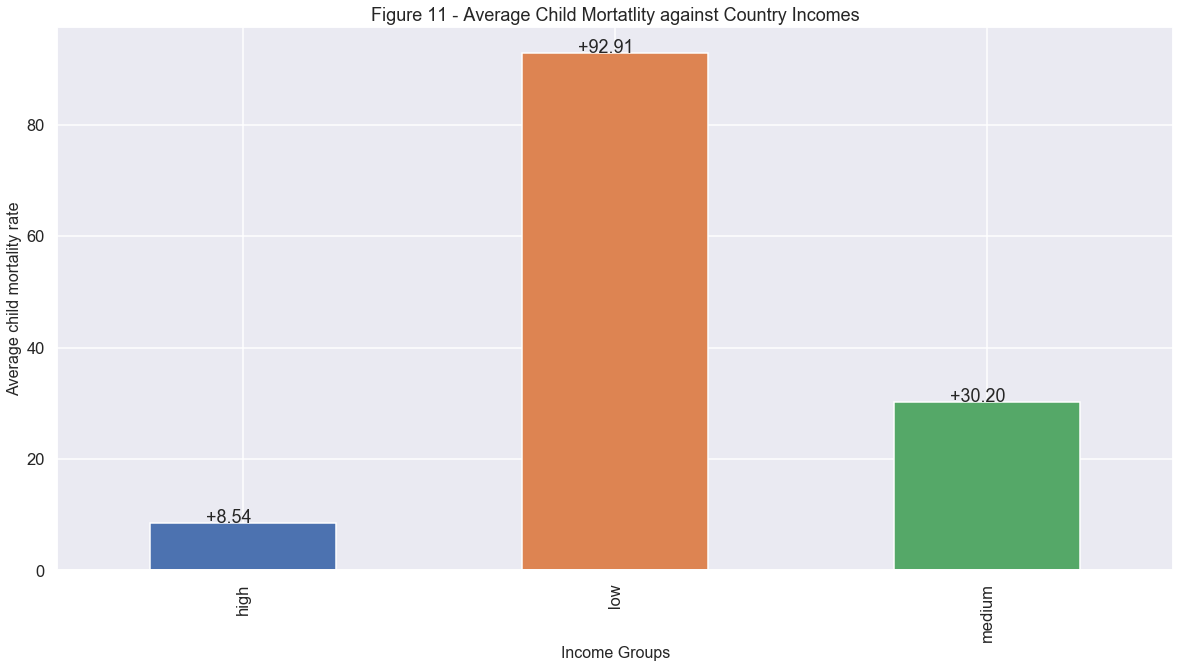

In [34]:
## *** Plotting the bar plot for Income groups over Child Mortality Rate *** | Start

df_bin_cig=df_bin.groupby('Income Groups')['child_mort'].mean().reset_index()
df_bin_cig=df_bin_cig.set_index(['Income Groups'])
plotbar(df_bin_cig['child_mort'],'Income Groups','Average child mortality rate','Figure 11 - Average Child Mortatlity against Country Incomes')
## *** Plotting the bar plot for Income groups over Child Mortality Rate *** | End

<b> Comments: </b> <center> It is very much clear that the <b> Child Mortality Rate is very high in Countries with Low Incomes </b> , whereas it has a sharp fall for Medium income countries and gradually decrease. The least child mortality rate is in High Income Countries <br>
We thus have a negative correlation between the income and the child mortality (-0.52) </center>

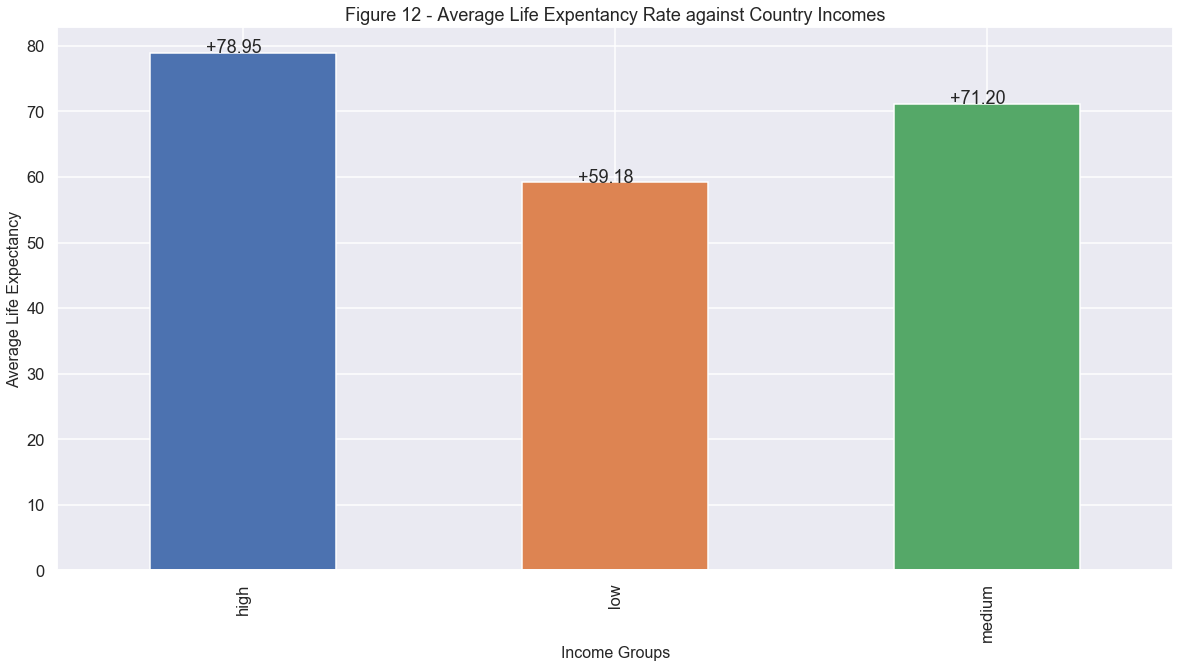

In [35]:
## *** Plotting the bar plot for Income groups over Child Mortality Rate *** | Start
df_bin_lex=df_bin.groupby('Income Groups')['life_expec'].mean().reset_index()
df_bin_lex=df_bin_lex.set_index(['Income Groups'])
plotbar(df_bin_lex['life_expec'],'Income Groups','Average Life Expectancy','Figure 12 - Average Life Expentancy Rate against Country Incomes')

## *** Plotting the bar plot for Income groups over Child Mortality Rate *** | End

<b> Comments: </b> <center> The <b> Life Expectancy Rate is low in Countries with Low Incomes </b> , whereas it has a gradual increase. The highest life expectancy rate is in High Income Countries <br>
We thus have a positive correlation between the income and the life expectancy. The trend will be similar for gdpp also, as gdpp and income are highly correlated (0.9)</center>

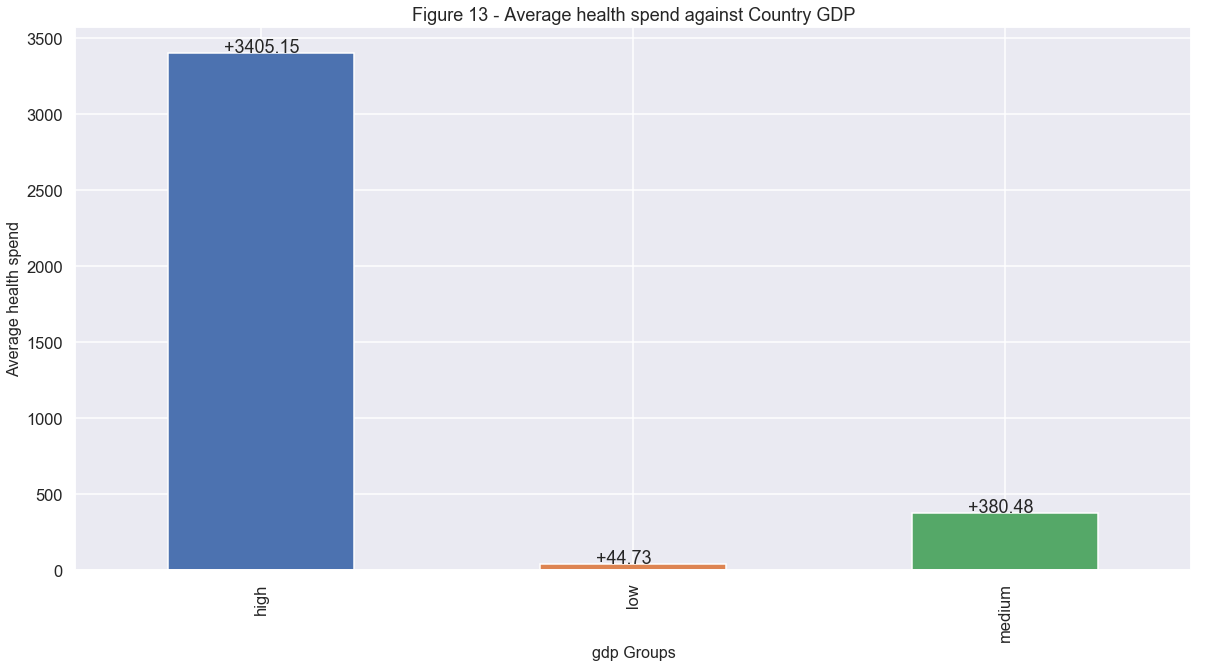

In [36]:
## *** Plotting the bar plot for gdp over health *** | Start
df_bin_hlth=df_bin.groupby('gdp Groups')['health'].mean().reset_index()
df_bin_hlth=df_bin_hlth.set_index(['gdp Groups'])
plotbar(df_bin_hlth['health'],'gdp Groups','Average health spend','Figure 13 - Average health spend against Country GDP')

## *** Plotting the bar plot for gdp over health *** | End

<b> Comments: </b> <center> The countries with low gdp spends least in health and vice-versa. The countries with high income are the ones with high health spends </center>

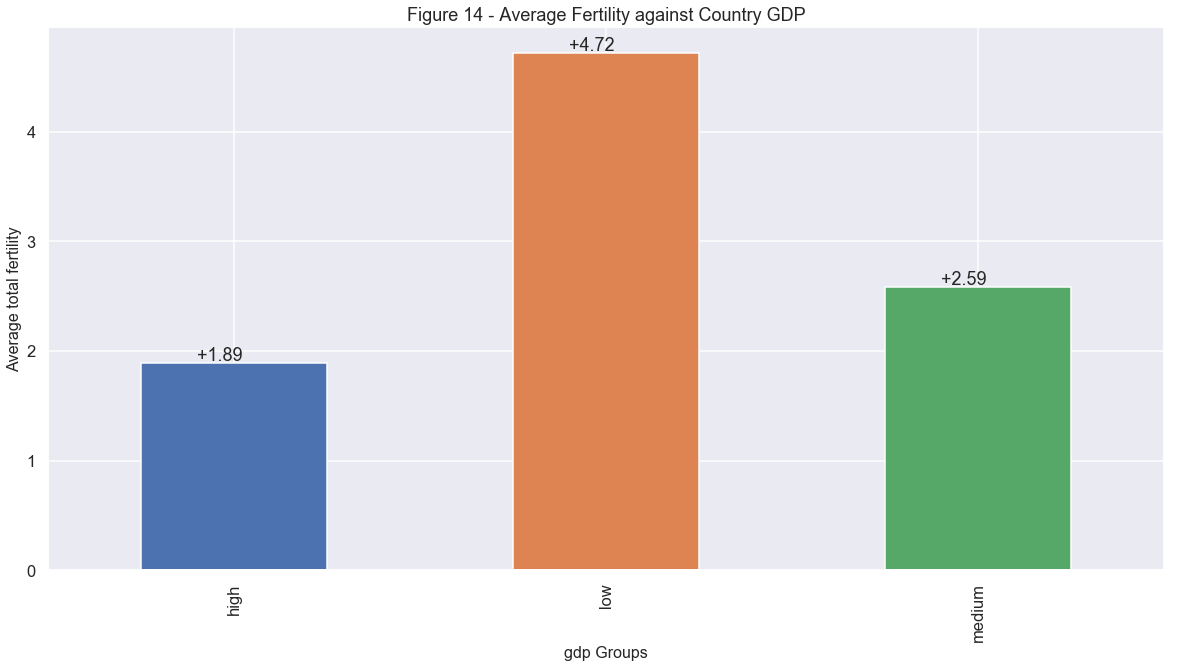

In [37]:
## *** Plotting the bar plot for gdp over health *** | Start
df_bin_totfer=df_bin.groupby('gdp Groups')['total_fer'].mean().reset_index()
df_bin_totfer=df_bin_totfer.set_index(['gdp Groups'])
plotbar(df_bin_totfer['total_fer'],'gdp Groups','Average total fertility','Figure 14 - Average Fertility against Country GDP')
## *** Plotting the bar plot for gdp over health *** | End

<b> Comments: </b> <center> Another issue with the lo GDP countries is the fertility rate is preety high compared to higher GDP countries </center>

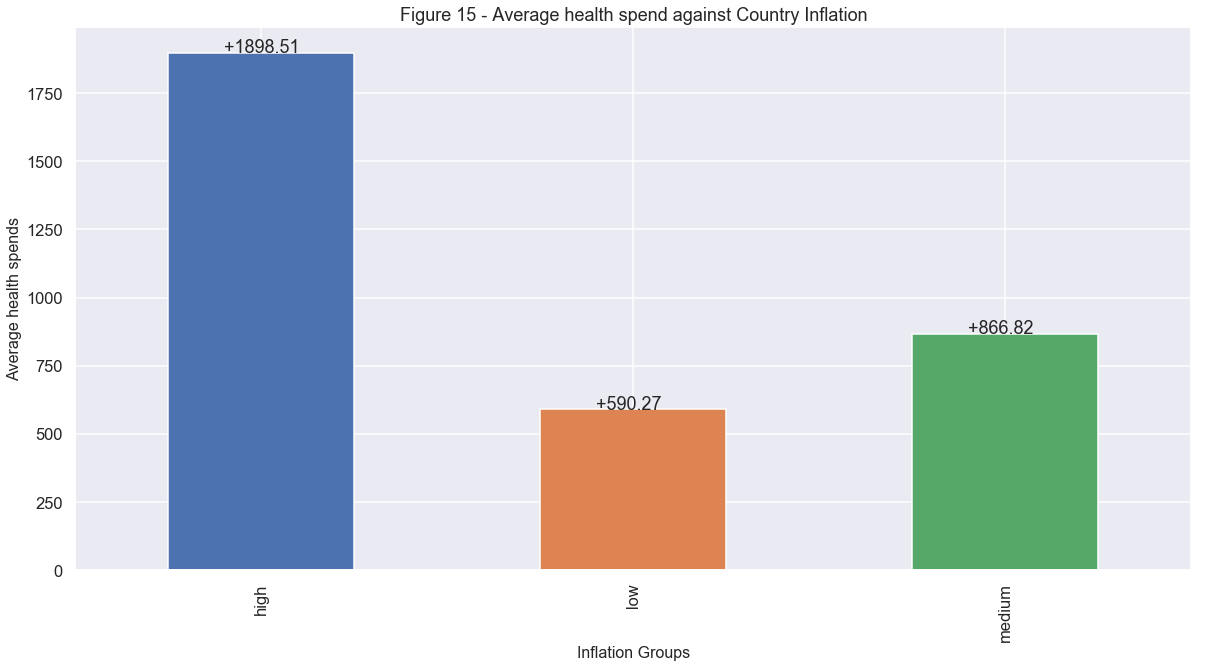

In [38]:
## *** Plotting the bar plot for inflation over health *** | Start
df_bin_infla=df_bin.groupby('Inflation Groups')['health'].mean().reset_index()
df_bin_infla=df_bin_infla.set_index(['Inflation Groups'])
plotbar(df_bin_infla['health'],'Inflation Groups','Average health spends','Figure 15 - Average health spend against Country Inflation')
## *** Plotting the bar plot for inflation over health *** | End

<b> Comments: </b> <center> The countries with high inflation are the ones spending higest on the health </center>

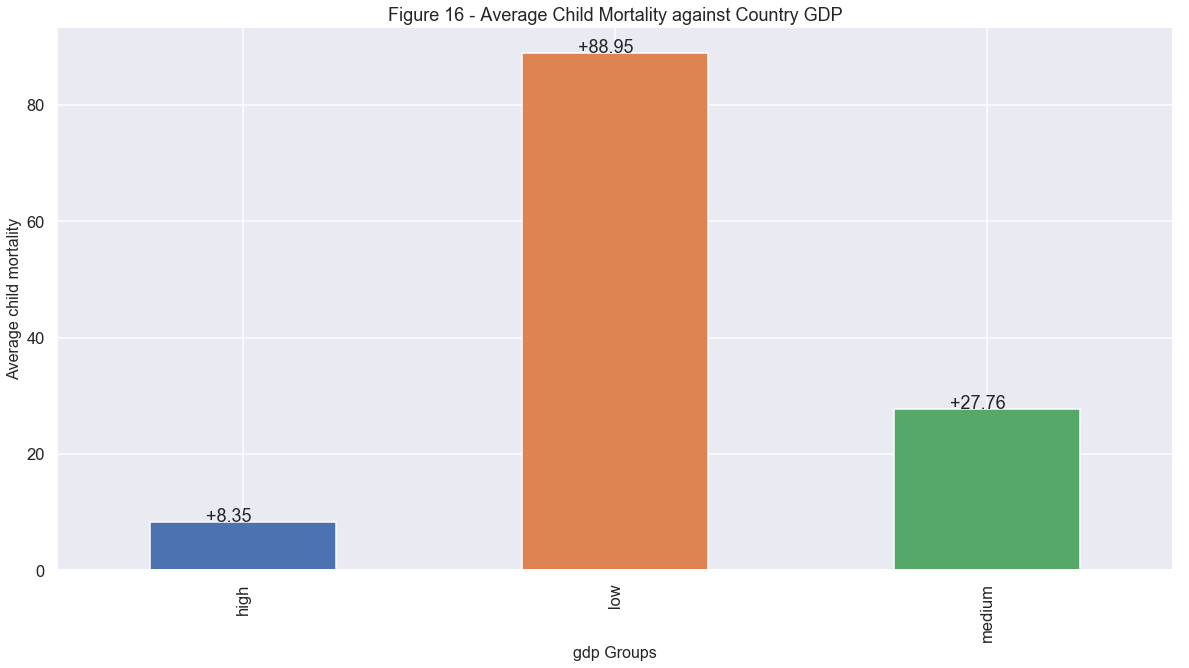

In [39]:
## *** Plotting the bar plot for gdp over child mortality *** | Start
df_bin_cm=df_bin.groupby('gdp Groups')['child_mort'].mean().reset_index()
df_bin_cm=df_bin_cm.set_index(['gdp Groups'])
plotbar(df_bin_cm['child_mort'],'gdp Groups','Average child mortality','Figure 16 - Average Child Mortality against Country GDP')
## *** Plotting the bar plot for gdp over child mortality *** | End

<b> Comments: </b> <center> The countries with low are the ones with higest child mortality rate</center>

<br> <br> <center> <b> <u> Consolidated Commensts after Univariate Analysis</u> : </b> </center>

<br>
    1.  Countries with <b> high inflation </b> are the ones spending high on <b> health </b><br>
    2. The countries with <b> low GDP </b> have the fertility rate is preety high compared to higher GDP countries <br>
    3. The countries with <b> low gdp spends least in health </b> and vice-versa. The countries with high income are the ones with high health spends <br>
    4. The <b> Life Expectancy Rate is low in Countries with Low Incomes </b> , whereas it has a gradual increase. The highest life expectancy rate is in High Income Countries <br>
    5. The <b> countries with low gdp are the ones with higest child mortality rate </b> <br>
    6. <b> Child Mortality Rate is very high in Countries with Low Incomes. </b> <br>

 #### **** <center> Vizualizing Data - Univariate Analysis | End </center> ****

 #### **** <center> Vizualizing Data - Bivariate Analysis | Start </center> ****

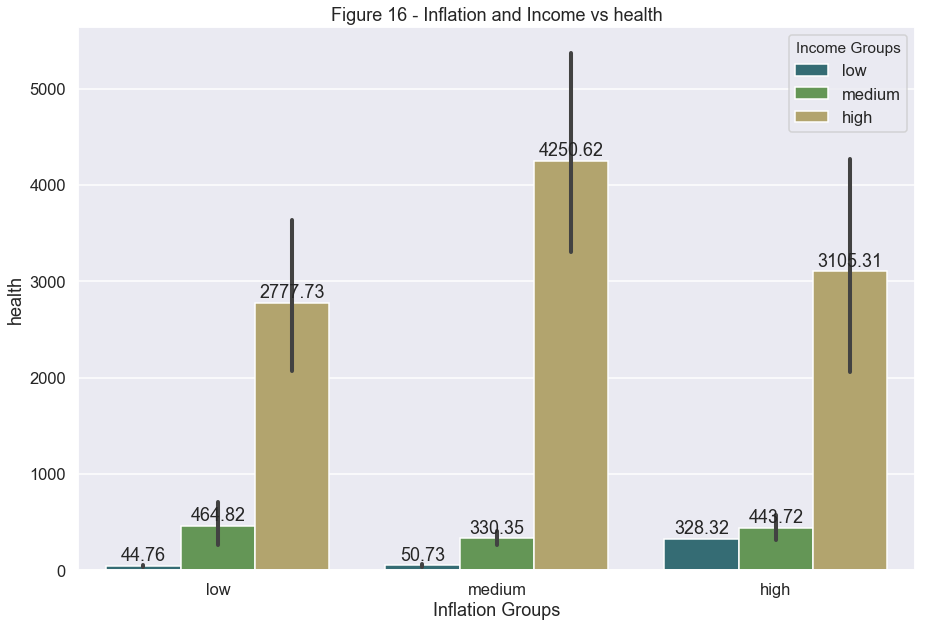

In [40]:
### **** Visualizing Inflation, Income against health | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='Inflation Groups', y='health', hue='Income Groups',data=df_bin,palette=("gist_earth"))
plt.title('Figure 16 - Inflation and Income vs health')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Inflation, Income against health | End **** ###

<b> Comments: </b> <center> The countries with Medium inflation and High income spends the most in health, the countries with Low/Medium inflation with Low income spends least in health </center>

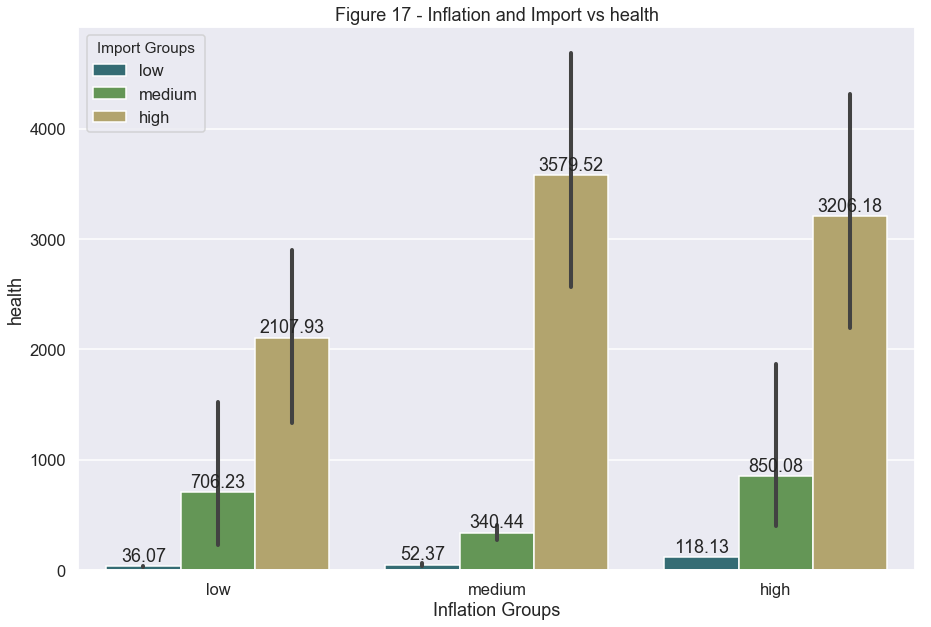

In [41]:
### **** Visualizing Inflation, Import against health | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='Inflation Groups', y='health', hue='Import Groups',data=df_bin,palette=("gist_earth"))
plt.title('Figure 17 - Inflation and Import vs health')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Inflation, Import against health | End **** ###

<b> Comments: </b> <center> The countries with Medium inflation and High import spends the most in health, the countries with Low/Medium inflation with Low import spends least in health </center>

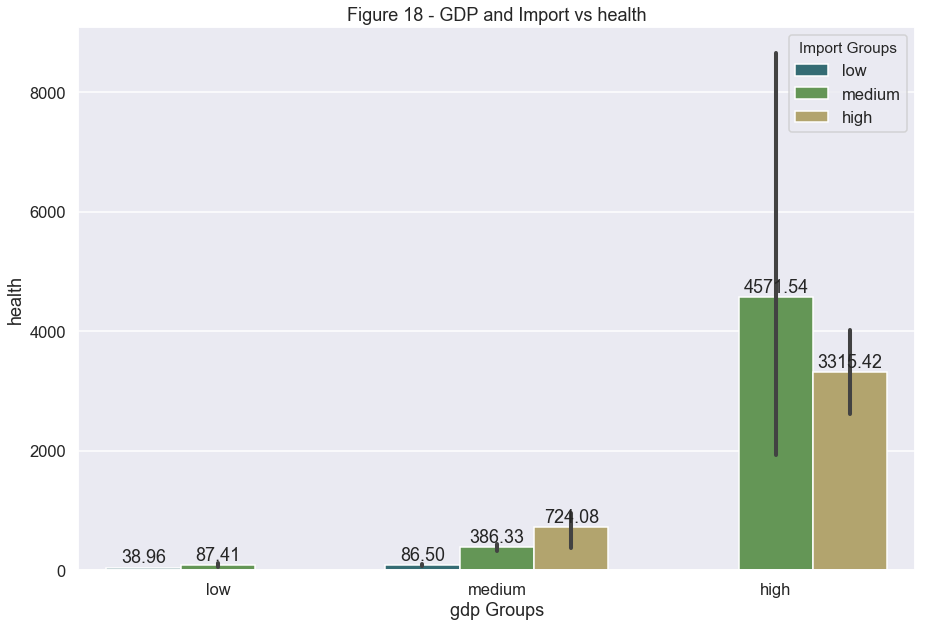

In [42]:
### **** Visualizing GDP, Import against health | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='health', hue='Import Groups',data=df_bin,palette=("gist_earth"))
plt.title('Figure 18 - GDP and Import vs health')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing GDP, Import against health | End **** ###

<b> Comments: </b> <center> The countries with low gdp and low imports spends the least in health, the countries with High gdp with High/Medium import spends the most in health </center>

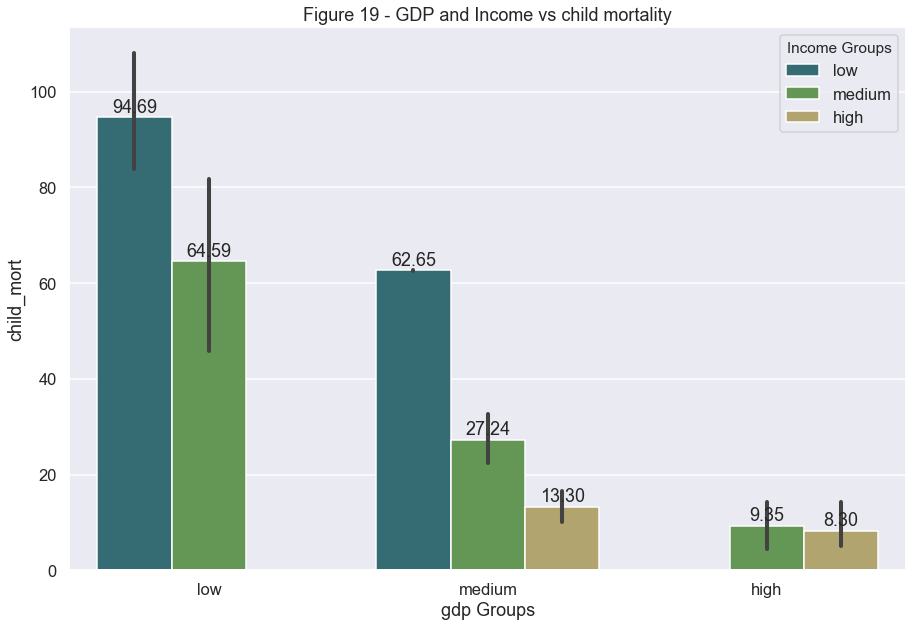

In [43]:
### **** Visualizing GDP, Import against child mortality | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='child_mort', hue='Income Groups',data=df_bin,palette=("gist_earth"))
plt.title('Figure 19 - GDP and Income vs child mortality')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing GDP, Import against child mortality | End **** ###

<b> Comments: </b> <center> The countries with low gdp and low income have the highest rate in child mortality, the countries with High gdp with High gdp and high income have the least child mortality rate</center>

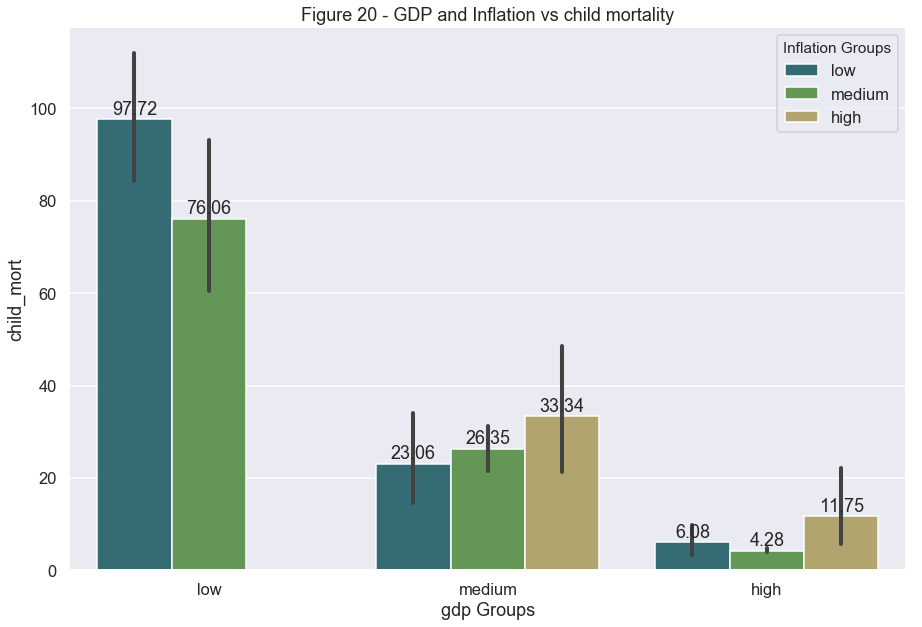

In [44]:
### **** Visualizing GDP, Import against child mortality | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='child_mort', hue='Inflation Groups',data=df_bin,palette=("gist_earth"))
plt.title('Figure 20 - GDP and Inflation vs child mortality')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing GDP, Income against child mortality | End **** ###

<b> Comments: </b> <center> The countries with low gdp but low inflation have the highest rate in child mortality, strangely enough the countries with High gdp but with High inflation also have high child mortality rate</center>

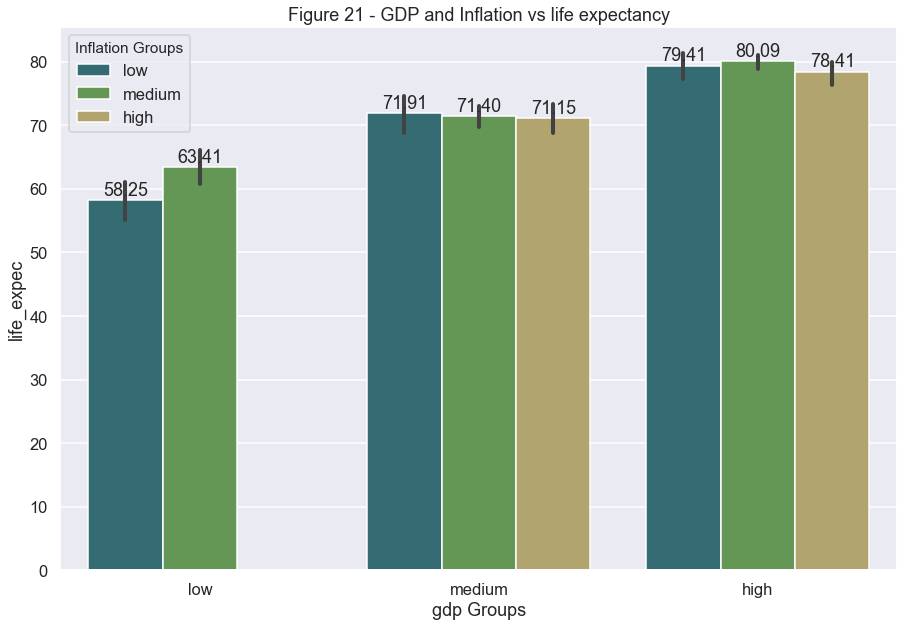

In [45]:
### **** Visualizing GDP, Inflation vs life expectancy | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='life_expec', hue='Inflation Groups',data=df_bin,palette=("gist_earth"))
plt.title('Figure 21 - GDP and Inflation vs life expectancy')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing GDP, Inflation vs life expectancy | End **** ###

<b> Comments: </b> <center> The countries with low gdp but low inflation have the least life expecctancy rate, the countries medium/high gdp with low inflation have the life expectancy on the higher side</center>

<br> <br> <center> <b> <u> Consolidated Commensts after Bivariate Analysis</u> : </b> </center>

<br>
    1.  The countries with <b>low gdp but low inflation have the least life expecctancy rate, the countries medium/high gdp with low inflation have the life expectancy on the higher side </b><br>
    2. The countries with <b> low gdp but low inflation have the highest rate in child mortality </b>, strangely enough the countries with High gdp but with High inflation also have high child mortality rate <br>
    3. The countries with <b>low gdp and low income have the highest rate in child mortality </b>, the countries with High gdp with High gdp and high income have the least child mortality rate <br>
    4. The countries with <b>low gdp and low imports spends the least in health</b>, the countries with <b> High gdp with High/Medium import spends the most in health</b> <br>
    5. The countries with <b> Medium inflation and High import spends the most in health </b>, the countries with Low/Medium inflation with Low import spends least in health <br>
    6. The countries with <b> Medium inflation and High income spends the most in health </b>, the countries with Low/Medium inflation with Low income spends least in health <br>

 #### **** <center> Vizualizing Data - Bivariate Analysis | End </center> ****

# <b><center>PCA Analysis</center></b>

In [46]:
# **** Scaling the data | start ****
df_normal = (df_quant - df_quant.mean())/df_quant.std()
# **** Scaling the data | End ****

In [47]:
## *** Fit the data in PCA | start ****
pca=PCA(svd_solver='randomized', random_state=42)
pca.fit(df_normal)
## *** Fit the data in PCA | end ****

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [48]:
pca.components_

array([[-3.04398325e-01,  3.45234858e-01,  3.51392110e-01,
         3.42482596e-01,  3.89766121e-01,  1.98223033e-01,
         3.34703015e-01, -2.88627917e-01,  4.01050652e-01],
       [ 5.06547942e-01,  3.56994215e-01,  1.11276141e-01,
         3.21558258e-01,  1.20200492e-01,  2.24418347e-01,
        -4.09638641e-01,  4.88316657e-01,  1.70626767e-01],
       [-3.11368022e-02, -2.13229790e-01, -2.29352324e-01,
        -3.20687304e-01,  2.51164094e-01,  8.56183108e-01,
         1.98918986e-02,  2.41131156e-02, -3.17911073e-02],
       [-1.46482725e-01,  4.30680283e-01, -6.60773681e-01,
         4.14033682e-01, -7.11837072e-02,  9.35371833e-02,
        -1.91072655e-02, -2.00101203e-01, -3.61648522e-01],
       [ 2.15215488e-01, -4.81797274e-02,  7.14598575e-02,
        -6.23594155e-02,  1.28301750e-01, -8.58217476e-03,
        -6.19685740e-01, -7.33255405e-01,  6.44740378e-02],
       [ 1.41410553e-01, -3.58297951e-02, -4.05526235e-01,
        -1.78933057e-01,  7.66731683e-01, -4.047075

In [49]:
## Checking the cumulative variance | Start ****
np.cumsum(pca.explained_variance_ratio_)
## Checking the cumulative variance | End ****

array([0.5992438 , 0.78418029, 0.88639985, 0.94651432, 0.97184392,
       0.98866973, 0.99798418, 0.99953852, 1.        ])

<b>3 components is able to describe >88% of data</b>

Prepare the scree plot for checking the cumulative variance against the components

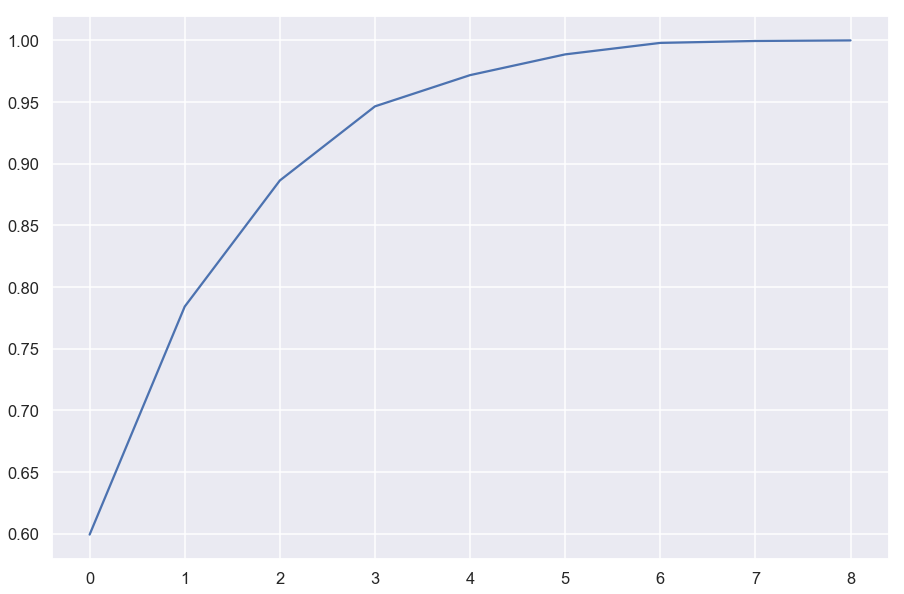

In [50]:
## **** Prepare the Scree Plot | Start ****
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
## **** Prepare the Scree Plot | End ****

We can see that the 3 components are enopugh to explain 88% of the data which we have see from the cumulative variance ratio

In [51]:
## *** Doing the PCA using 3 components | Start ****
pca_f = PCA(svd_solver='randomized', random_state=42,n_components=3)
pca_norm = pca_f.fit_transform(df_normal)
## *** Doing the PCA using 3 components | End ****

In [52]:
pca_norm.shape

(167, 3)

In [53]:
# Checking the columns for the dataframe 
columns=list(df_normal.columns)
columns

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [54]:
## *** Get components and the features on same dataframe **** | Start 
df_pca_ = pd.DataFrame({'Features':columns,'PC1':pca_f.components_[0],'PC2':pca_f.components_[1],
                        'PC3':pca_f.components_[2]})

## *** Get components and the features on same dataframe **** | End 

In [55]:
df_pca_.Features

0    child_mort
1       exports
2        health
3       imports
4        income
5     inflation
6    life_expec
7     total_fer
8          gdpp
Name: Features, dtype: object

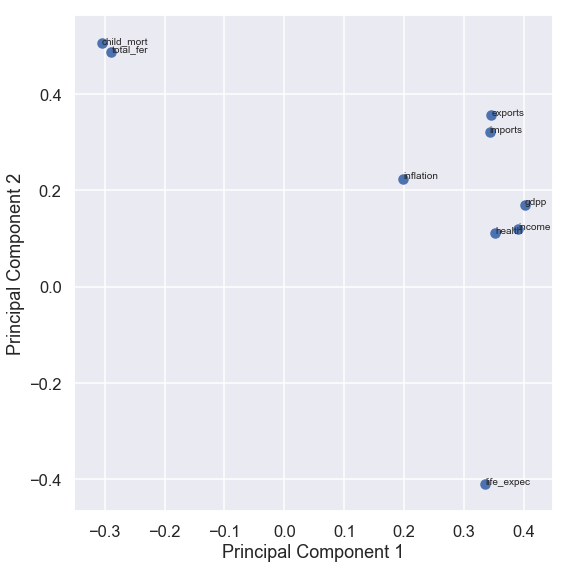

In [56]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca_.PC1, df_pca_.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca_.Features):
    plt.annotate(txt, (df_pca_.PC1[i],df_pca_.PC2[i]))
plt.tight_layout()
plt.show()

<b> PC1 </b> is in the direction of <b> income </b>, <b> gdpp </b> and <b> health </b>. The second component <b> PC2 </b> is in the direction of <b> child_mort </b>, total_fer </b> . <b> PC3 </b> is in the direction of <b> inflation </b>.

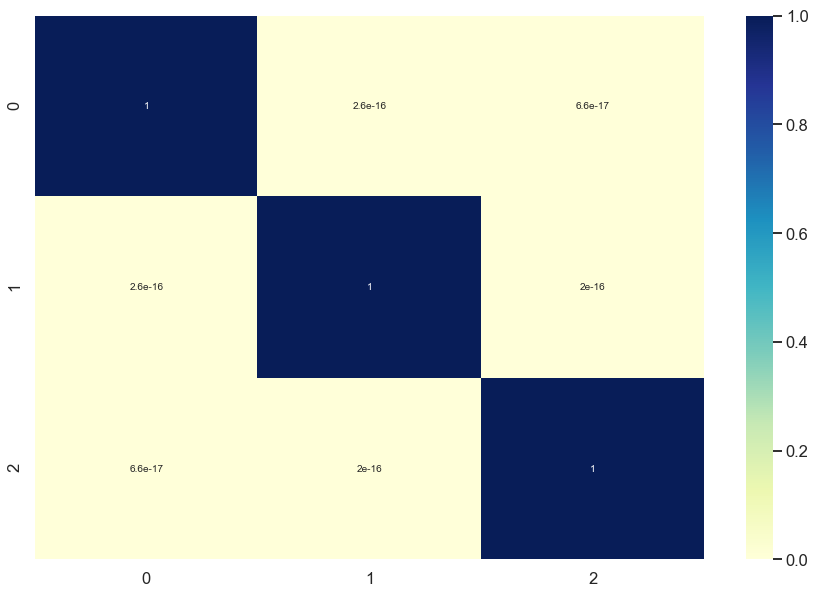

In [57]:
## Plotting the correlation between the PC's (Prinicpal Components) | Start
pca_norm_corr = np.corrcoef(pca_norm.transpose())
plt.figure(figsize=(15,10))
sns.heatmap(pca_norm_corr,annot=True,cmap='YlGnBu')
plt.show()
## Plotting the correlation between the PC's (Prinicpal Components) | End

<center> <b> As expected the PCs have no correlation between themselves </b> </center>

In [58]:
# Check the diagonals | Start
np.diagflat(pca_norm_corr.diagonal())
# Check the diagonals | End

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [59]:
# Convert to diagonal with zero
pca_norm_corr_diag = pca_norm_corr - np.diagflat(pca_norm_corr.diagonal())

In [60]:
pd.DataFrame(pca_norm_corr_diag)

,0,1,2
0,0.000000e+00,2.559392e-16,6.649093e-17
1,2.559392e-16,0.000000e+00,2.032593e-16
2,6.649093e-17,2.032593e-16,0.000000e+00


The diagonals are now converted to zero

<b> <center> Check if the correlations are indeed close to zero | Start  </b> </center> 

In [61]:
round(pca_norm_corr_diag.max(),15)

0.0

In [62]:
round(pca_norm_corr_diag.min(),15)

0.0

<b> <center> Check if the correlations are indeed close to zero | End  </b> </center> 

This confirms that the multicollinearity has been removed successfully from the data

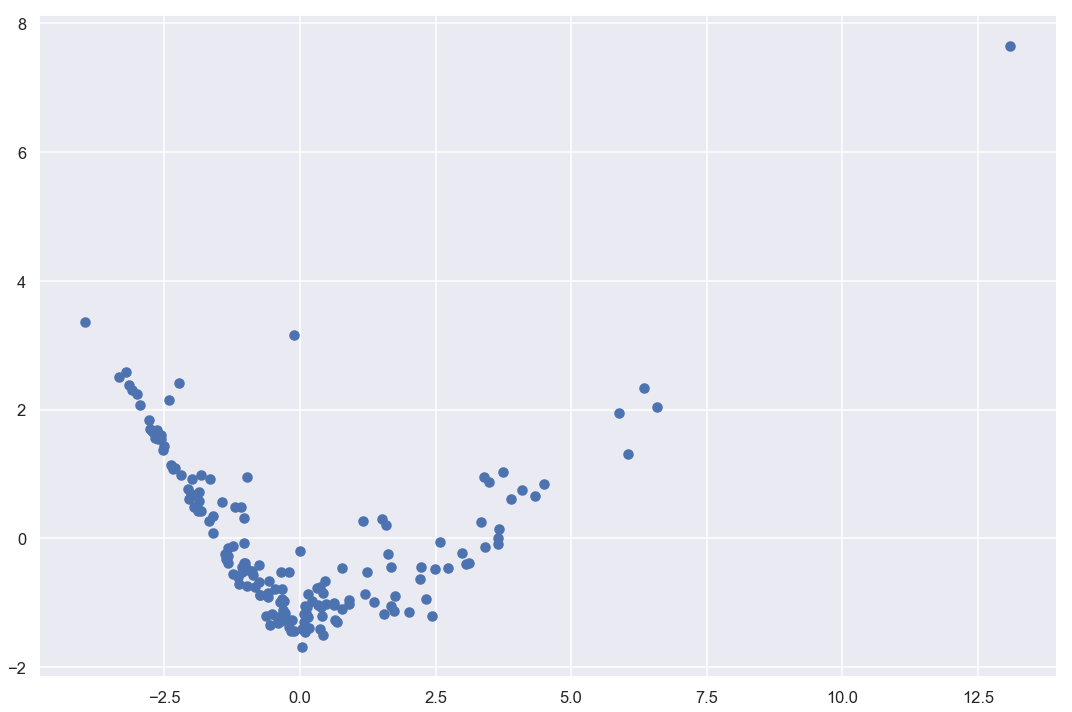

In [63]:
### *** Plot the spread the data *** | Start
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
plt.scatter(pca_norm[:,0],pca_norm[:,1])
plt.tight_layout()
plt.show()
### *** Plot the spread the data *** | End

<center><b> The above gives us a fair idea on the spread of the data </b> </center>

Now we can check the data for the outliers

In [64]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Income Groups,Inflation Groups,Import Groups,gdp Groups,Exports Groups
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,52.2032,56.2,5.82,553,low,low,low,low,low
1,Albania,16.6,1145.20,267.8950,1987.740,9930,183.6410,76.3,1.65,4090,medium,medium,medium,medium,medium
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,718.0600,76.5,2.89,4460,medium,high,medium,medium,medium
3,Angola,119.0,2199.19,100.6050,1514.370,5900,790.7200,60.1,6.16,3530,medium,high,medium,medium,medium
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,175.6800,76.8,2.13,12200,medium,medium,medium,medium,medium


In [65]:
countries=list(df.country)
df_clust = pd.DataFrame({'Country':countries,
                         'PC1':pca_norm[:,0],
                         'PC2':pca_norm[:,1],
                         'PC3':pca_norm[:,2]})


In [66]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [67]:
# Check the hopkins stats for the new outlier removed dataset **** | Start 
hopkins(df_clust.drop(['Country'],axis=1))
# Check the hopkins stats for the new outlier removed dataset **** | End 

0.9570725689288742

In [68]:
# Checking the IQR | Start
Q1 = df_clust.quantile(0.25)
Q3 = df_clust.quantile(0.95)
IQR = Q3 - Q1
print(IQR)
# Checking the IQR | End

PC1    5.356678
PC2    3.275734
PC3    2.254826
dtype: float64


In [69]:
# Checking the Outliers | Start
df_outliers = df_clust[((df_clust < (Q1 - 1.5*IQR)) | (df_clust > (Q3 + 1.5*IQR))).any(axis=1)]
len(df_outliers)
# Checking the Outliers | End

1

In [70]:
#***** Percentage of the outliers in data | Start ******
len(df_outliers)/len(df_clust)*100
#***** Percentage of the outliers in data | End ******

0.5988023952095809

<center> <b> We take the data till 95 percentile and thus we are removing 1 country which may show up as an Outlier and may form a seperate cluster, we can see from above we loose 0.6%(approx) information from the original dataset. To avoid it, we remove this high end country but retaining most of the information </b> </center>

In [71]:
df_outliers

,Country,PC1,PC2,PC3
91,Luxembourg,13.092921,7.644253,-2.848881


In [72]:
# Check the number of data after we do outlier treatment | Start 
df_out_ex = df_clust[~((df_clust < (Q1 - 1.5*IQR)) | (df_clust > (Q3 + 1.5*IQR))).any(axis=1)]
len(df_out_ex)
# Check the number of data after we do outlier treatment | end

166

In [73]:
df_out_ex.shape

(166, 4)

In [74]:
df_out_ex.head()

,Country,PC1,PC2,PC3
0,Afghanistan,-2.644408,1.575935,-0.249473
1,Albania,-0.163437,-1.435221,-0.092994
2,Algeria,-0.330999,-0.789770,0.373888
3,Angola,-2.417752,2.141078,0.285958
4,Antigua and Barbuda,0.469776,-1.021416,-0.205063


In [75]:
# Check the hopkins stats for the new outlier removed dataset **** | Start 
hopkins(df_out_ex.drop(['Country'],axis=1))
# Check the hopkins stats for the new outlier removed dataset **** | End 

0.8489024788101627

<center> <b> we got the hopkins score as  0.963779734183991 earlier and now we have have got it as 0.8945359259376799, we are not loosing much variations </b>  <br>
    <b> Note: </b> The above hopkins stats differ in each run. The above stats were taken in one of the same run. 

#### <center> Visualizing the dataset now with PCs </center>

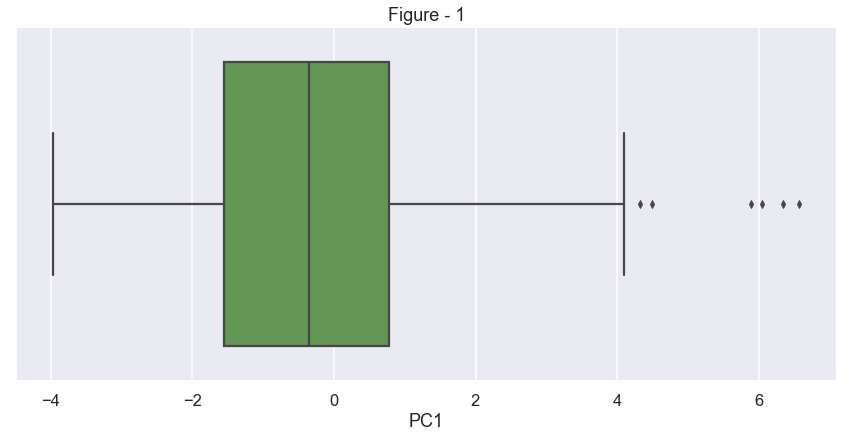

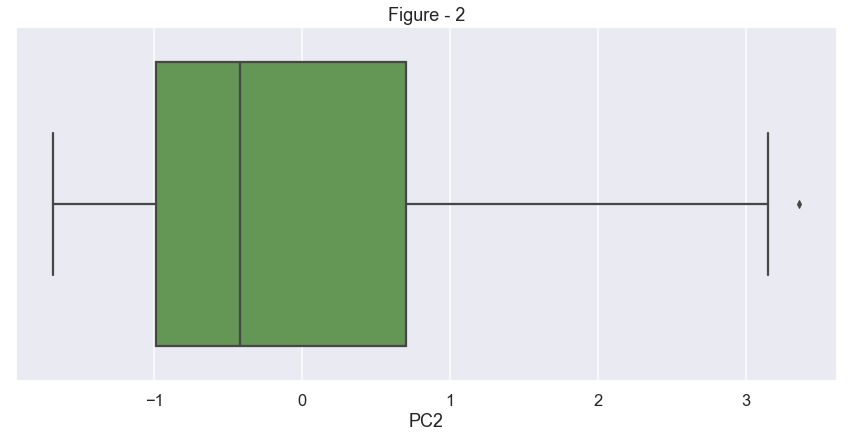

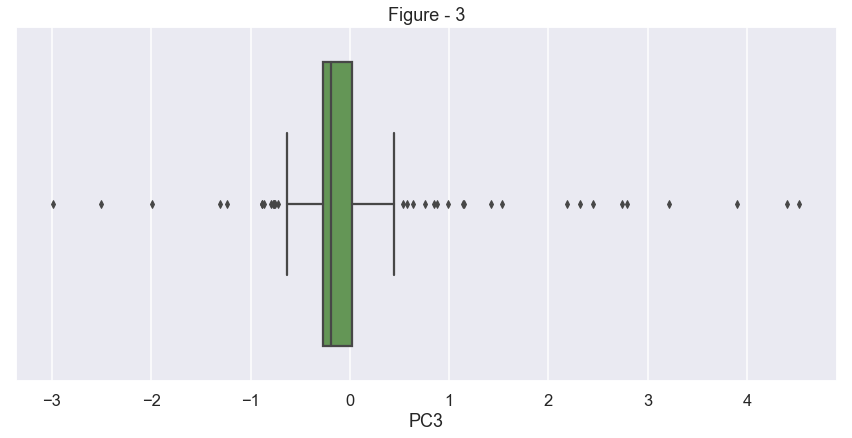

In [76]:
# Check the data after cleaning | Start
for i in range(1,len(df_out_ex.columns)):
    sns.set(style="darkgrid")
    sns.set_context('talk')
    plt.figure(figsize=(50,30))
    plt.subplot(4,3,i)
    sns.boxplot(x=df_out_ex.columns[i],data=df_out_ex,palette=("gist_earth"))
    plt.title('Figure - '+str(i))
    plt.show()
# Check the data after cleaning | End

 ### <center> K Means | Start </center>

In [77]:
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score


In [78]:
df_pca_k = df_out_ex

In [79]:
df_pca_k

,Country,PC1,PC2,PC3
0,Afghanistan,-2.644408,1.575935,-0.249473
1,Albania,-0.163437,-1.435221,-0.092994
2,Algeria,-0.330999,-0.789770,0.373888
3,Angola,-2.417752,2.141078,0.285958
4,Antigua and Barbuda,0.469776,-1.021416,-0.205063
5,Argentina,0.469033,-0.663664,1.423488
6,Armenia,-0.414160,-1.309265,-0.057693
7,Australia,3.054935,-0.393867,-0.270333
8,Austria,3.645918,0.003237,-0.889017
9,Azerbaijan,-0.352015,-0.528397,0.403351


 #### <center> Check Silhouette Score | Start </center>

In [80]:
# Prepare the Silhouette Score | STart 
sse=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(df_pca_k.drop(['Country'],axis=1))
    sse.append([k,silhouette_score(df_pca_k.drop(['Country'],axis=1),kmeans.labels_)])
# Prepare the Silhouette Score | End 

In [81]:
sse_df=pd.DataFrame(sse)

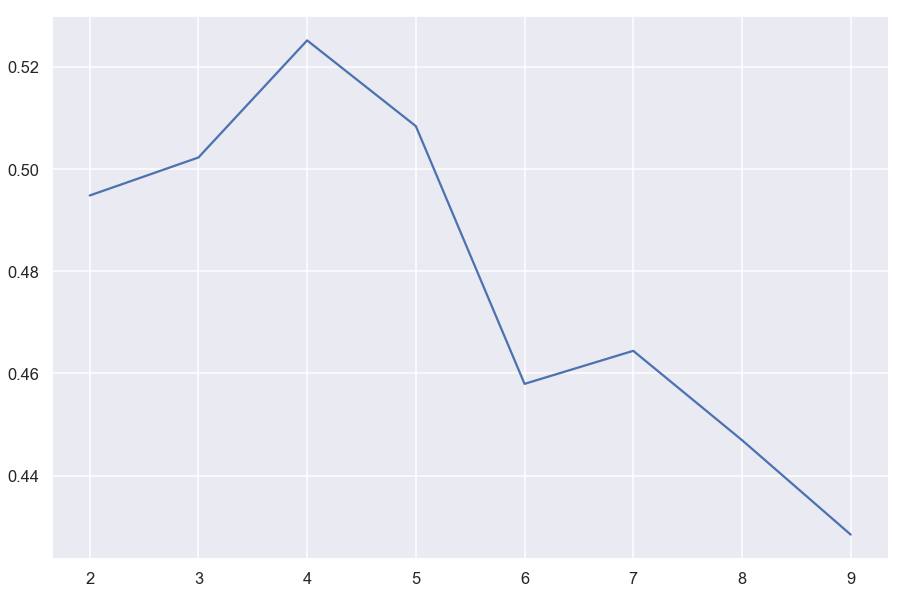

In [82]:
## **** Prepare the Silhouette | Start ****
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
plt.plot(sse_df[0],sse_df[1])
plt.show()
## **** Prepare the Silhouette | End ****

<b> <center> From the above graph we can definitely choose k as 4 </center> </b>

#### <center> Check the Sum of Squared Distance </center>
##### <center> The less the distance the better it will be </center>

In [83]:
ssd=[]
for i in range(2,10):
    modelc = KMeans(n_clusters=i,max_iter=50)
    modelc.fit(df_pca_k.drop(['Country'],axis=1))
    ssd.append(modelc.inertia_)

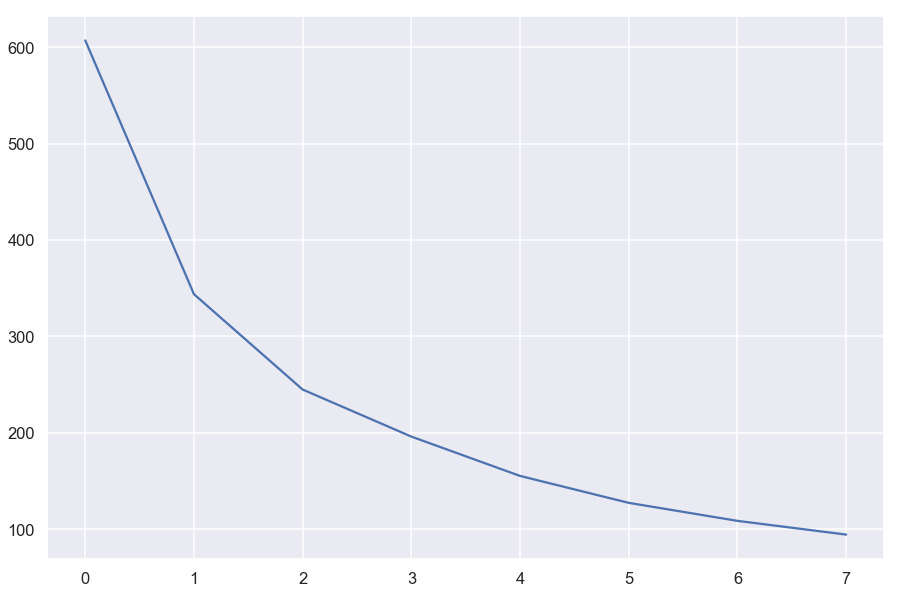

In [84]:
## **** Prepare the Line Plot for Sum of Squared Distance | Start ****
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
plt.plot(ssd)
plt.show()
## **** Prepare the Line Plot for Sum of Squared Distance | Start ****

We can see that there is an elbow like curve at 4, so we go ahead with k=4

<center> <b> Perform K Means clustering usiong k=4 </b> </center>

In [85]:
df_pca_k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 166
Data columns (total 4 columns):
Country    166 non-null object
PC1        166 non-null float64
PC2        166 non-null float64
PC3        166 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.5+ KB


In [86]:
 ## Run the K-Means model using k=4 | Start
model_k3 = KMeans(n_clusters=4,max_iter=50, random_state=0)
model_k3.fit(df_pca_k.drop(['Country'],axis=1))
 ## Run the K-Means model using k=4 | End

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [87]:
len(model_k3.labels_)

166

In [88]:
## *** Concat the Country with the output from K-Means model run | Start ***
df_pca_k_t = df_pca_k
df_pca_k_t.index = pd.RangeIndex(len(df_pca_k_t.index))
df_pca_k_fit=pd.concat([df_pca_k_t,pd.DataFrame(model_k3.labels_)],axis=1)
df_pca_k_fit.columns=['country','PC1','PC2','PC3','Cluster ID']
#df_pca_k_fit['Cluster ID'] = df_pca_k_fit['Cluster ID'].apply(lambda x: int(x))
df_pca_k_fit.info()
## *** Concat the Country with the output from K-Means model run | End ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
country       166 non-null object
PC1           166 non-null float64
PC2           166 non-null float64
PC3           166 non-null float64
Cluster ID    166 non-null int32
dtypes: float64(3), int32(1), object(1)
memory usage: 5.9+ KB


In [89]:
len(df_pca_k_fit)

166

In [90]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Income Groups',
       'Inflation Groups', 'Import Groups', 'gdp Groups', 'Exports Groups'],
      dtype='object')

In [91]:
df_pca_k_fit_join= df_pca_k_fit.merge(df, how='inner', left_on='country',right_on='country')
df_pca_k_fit_join

,country,PC1,PC2,PC3,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Income Groups,Inflation Groups,Import Groups,gdp Groups,Exports Groups
0,Afghanistan,-2.644408,1.575935,-0.249473,2,90.2,55.3000,41.9174,248.297,1610,52.2032,56.2,5.82,553,low,low,low,low,low
1,Albania,-0.163437,-1.435221,-0.092994,0,16.6,1145.2000,267.8950,1987.740,9930,183.6410,76.3,1.65,4090,medium,medium,medium,medium,medium
2,Algeria,-0.330999,-0.789770,0.373888,0,27.3,1712.6400,185.9820,1400.440,12900,718.0600,76.5,2.89,4460,medium,high,medium,medium,medium
3,Angola,-2.417752,2.141078,0.285958,2,119.0,2199.1900,100.6050,1514.370,5900,790.7200,60.1,6.16,3530,medium,high,medium,medium,medium
4,Antigua and Barbuda,0.469776,-1.021416,-0.205063,0,10.3,5551.0000,735.6600,7185.800,19100,175.6800,76.8,2.13,12200,medium,medium,medium,medium,medium
5,Argentina,0.469033,-0.663664,1.423488,0,14.5,1946.7000,834.3000,1648.000,18700,2152.7000,75.8,2.37,10300,medium,high,medium,medium,medium
6,Armenia,-0.414160,-1.309265,-0.057693,0,18.1,669.7600,141.6800,1458.660,6700,250.1940,73.3,1.69,3220,medium,medium,medium,medium,medium
7,Australia,3.054935,-0.393867,-0.270333,1,4.8,10276.2000,4530.8700,10847.100,41400,602.0400,82.0,1.93,51900,high,high,high,high,high
8,Austria,3.645918,0.003237,-0.889017,1,4.3,24059.7000,5159.0000,22418.200,43200,409.4370,80.5,1.44,46900,high,medium,high,high,high
9,Azerbaijan,-0.352015,-0.528397,0.403351,0,39.2,3171.1200,343.3920,1208.880,16000,805.9200,69.1,1.92,5840,medium,high,medium,medium,medium


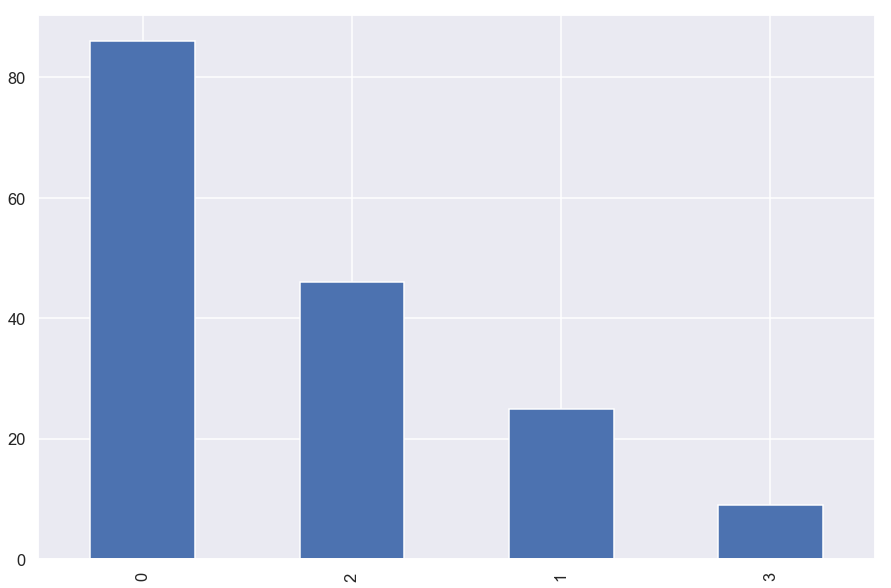

In [92]:
# **** Get the value counts inside each cluster **** | Start
df_pca_k_fit_join['Cluster ID'].value_counts()
ax=df_pca_k_fit_join['Cluster ID'].value_counts().plot.bar(figsize=(15,10))
# **** Get the value counts inside each cluster **** | End

<center><b> Number of items in various clusters </b></center>

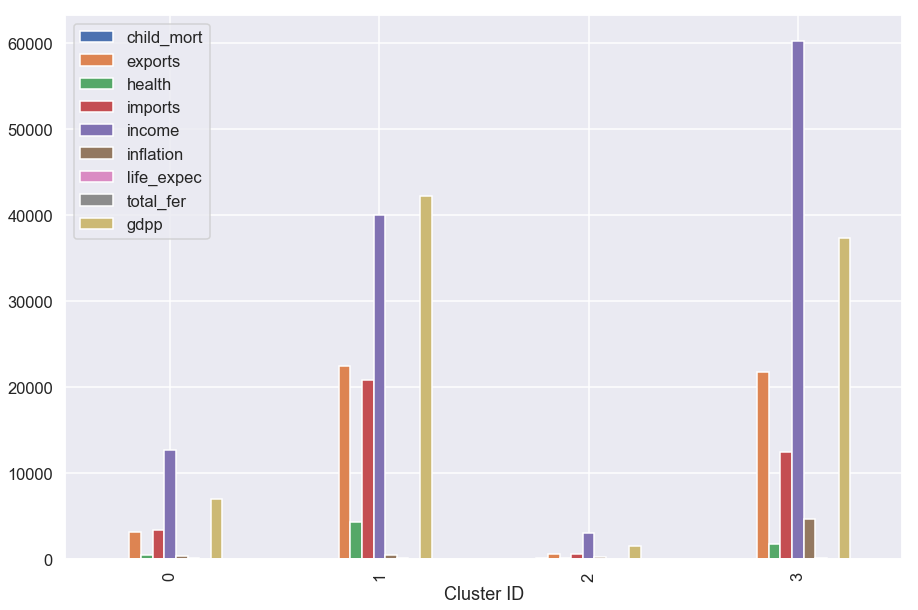

In [93]:
# Visualize the features against the Cluster IDs | Start
df_pca_k_fit_g = df_pca_k_fit_join
df_pca_k_fit_g = df_pca_k_fit_g.drop(['PC1','PC2','PC3'],axis=1)
df_pca_k_fit_gb = df_pca_k_fit_g.groupby('Cluster ID').mean()
df_pca_k_fit_gb.plot.bar(figsize=(15,10))
# Visualize the features against the Cluster IDs | End

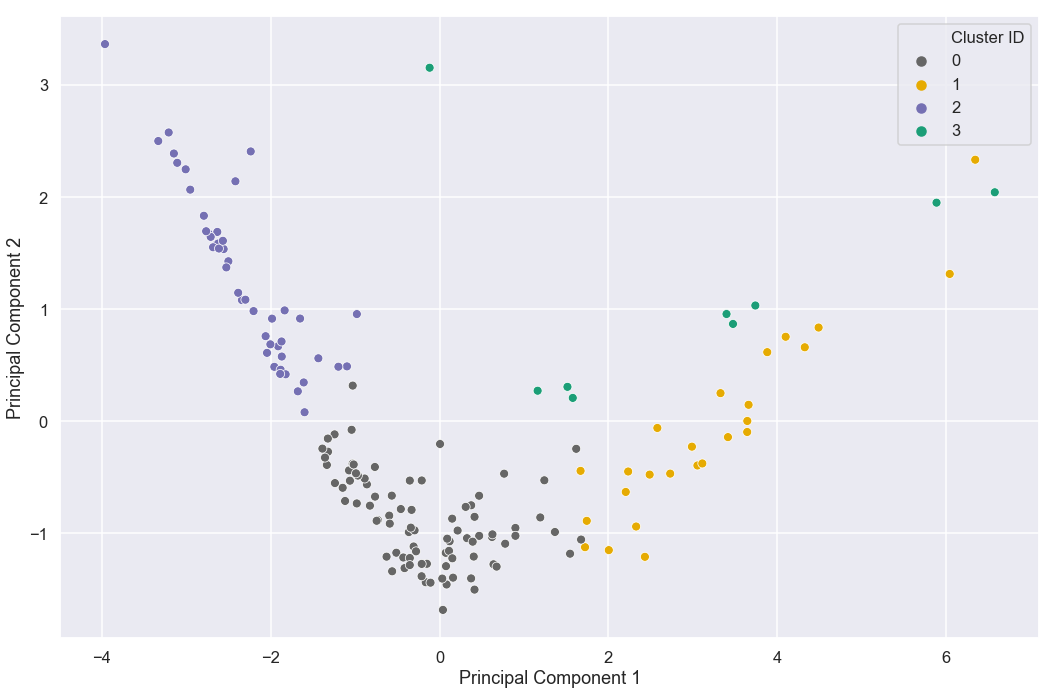

In [94]:
# Plotting the datapoints for each cluster | Start
fig = plt.figure(figsize = (15,10))
sns.scatterplot(df_pca_k_fit_join['PC1'], df_pca_k_fit_join['PC2'], hue=df_pca_k_fit_join['Cluster ID'], palette="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Plotting the datapoints for each cluster | End

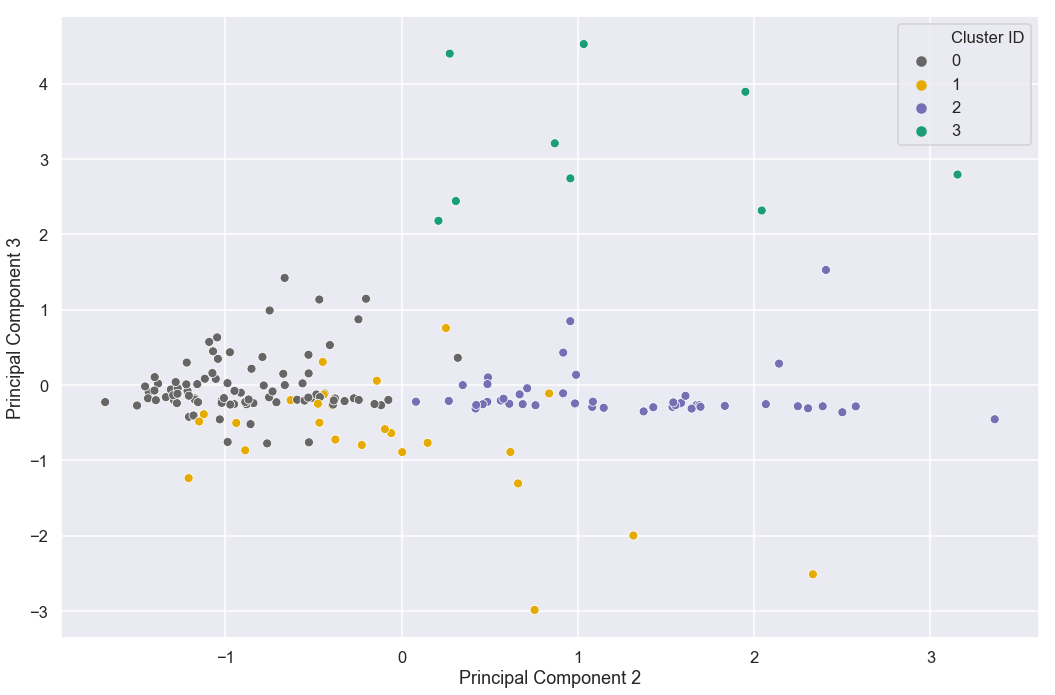

In [95]:
# Plotting the datapoints for each cluster | Start
fig = plt.figure(figsize = (15,10))
sns.scatterplot(df_pca_k_fit_join['PC2'], df_pca_k_fit_join['PC3'], hue=df_pca_k_fit_join['Cluster ID'], palette="Dark2_r")
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.tight_layout()
plt.show()
# Plotting the datapoints for each cluster | End

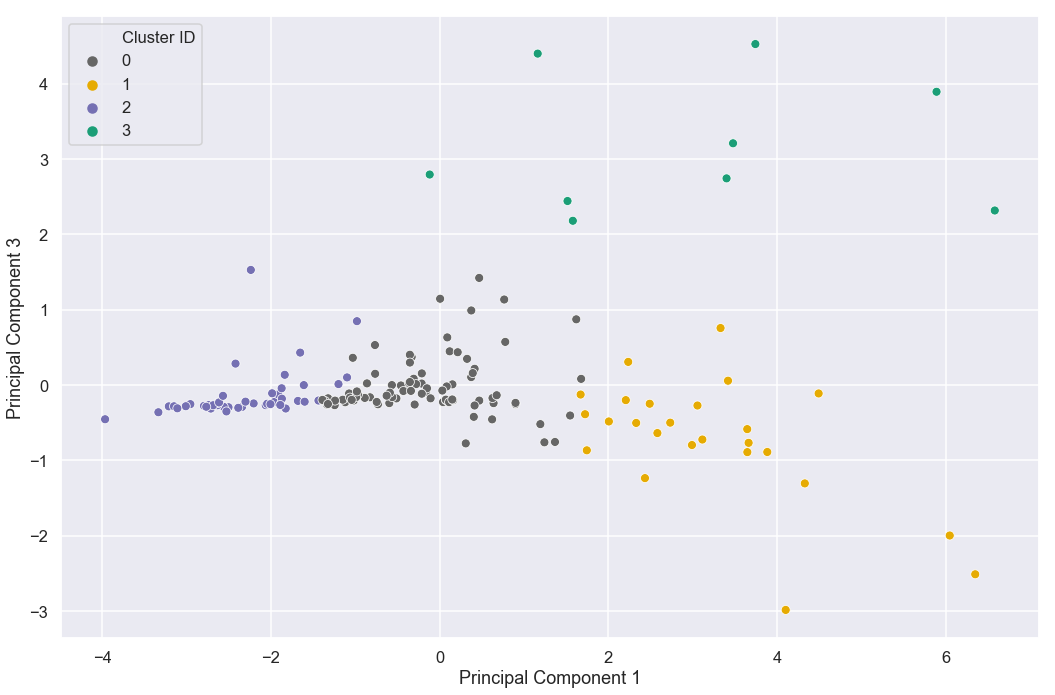

In [96]:
# Plotting the datapoints for each cluster | Start
fig = plt.figure(figsize = (15,10))
sns.scatterplot(df_pca_k_fit_join['PC1'], df_pca_k_fit_join['PC3'], hue=df_pca_k_fit_join['Cluster ID'], palette="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.tight_layout()
plt.show()
# Plotting the datapoints for each cluster | End

There are some clusters which are well formed but there are some which are not so well formed, which we can expect as we choose to keep the variations and removed only one outlier from the dataset

In [97]:
df_pca_k_fit_join.head()

,country,PC1,PC2,PC3,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Income Groups,Inflation Groups,Import Groups,gdp Groups,Exports Groups
0,Afghanistan,-2.644408,1.575935,-0.249473,2,90.2,55.30,41.9174,248.297,1610,52.2032,56.2,5.82,553,low,low,low,low,low
1,Albania,-0.163437,-1.435221,-0.092994,0,16.6,1145.20,267.8950,1987.740,9930,183.6410,76.3,1.65,4090,medium,medium,medium,medium,medium
2,Algeria,-0.330999,-0.789770,0.373888,0,27.3,1712.64,185.9820,1400.440,12900,718.0600,76.5,2.89,4460,medium,high,medium,medium,medium
3,Angola,-2.417752,2.141078,0.285958,2,119.0,2199.19,100.6050,1514.370,5900,790.7200,60.1,6.16,3530,medium,high,medium,medium,medium
4,Antigua and Barbuda,0.469776,-1.021416,-0.205063,0,10.3,5551.00,735.6600,7185.800,19100,175.6800,76.8,2.13,12200,medium,medium,medium,medium,medium


In [98]:
##**** Prepare the data with group by over Cluster ID ***** | Start ******
df_clust_PC1 = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).PC1.mean())
df_clust_PC2 = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).PC2.mean())
df_clust_PC3 = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).PC3.mean())
df_clust_child_mort = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).child_mort.mean())
df_clust_health = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).health.mean())
df_clust_total_fer =  pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).total_fer.mean())
df_clust_income = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).income.mean())
df_clust_life_expec = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).life_expec.mean())
df_clust_life_gdp = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).gdpp.mean())
df_clust_infl = pd.DataFrame(df_pca_k_fit_join.groupby(["Cluster ID"]).inflation.mean())
##**** Prepare the data with group by over Cluster ID ***** | End ******

In [99]:
##**** Prepare the data with PCs ***** | Start ******
df_PC_feature = pd.concat([pd.Series([1,2,3,4]),df_clust_child_mort,df_clust_health,df_clust_total_fer,df_clust_income,df_clust_life_expec,df_clust_infl,df_clust_life_gdp], axis=1)
df_PC_feature.columns = ["ClusterID", "Child_Mortality", "Health Spend", "Total Fertility","Income","Life_Expectancy","Inflation","GDP"]
##**** Prepare the data with PCs ***** | End ******

In [100]:
##**** Prepare the PCs with Cluster ID and take the absolute value of the PCs ***** | Start ******
df_PC_clust = pd.concat([pd.Series([1,2,3,4]),df_clust_PC1, df_clust_PC2, df_clust_PC3], axis=1)
df_PC_clust.columns = ["ClusterID", "PC1_mean", "PC2_mean","PC3_mean"]
df_PC_clust.PC1_mean=df_PC_clust.PC1_mean.apply(lambda x:abs(x))
df_PC_clust.PC2_mean=df_PC_clust.PC2_mean.apply(lambda x:abs(x))
df_PC_clust.PC3_mean=df_PC_clust.PC3_mean.apply(lambda x:abs(x))
df_PC_clust
##**** Prepare the PCs with Cluster ID and take the absolute value of the PCs ***** | End ******

,ClusterID,PC1_mean,PC2_mean,PC3_mean
0,1,0.176651,0.873902,0.017870
1,2,3.207689,0.085527,0.714612
2,3,2.289432,1.279428,0.136272
3,4,3.024522,1.199529,3.168837


In [101]:
df_pca_k_fit_join.head()

,country,PC1,PC2,PC3,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Income Groups,Inflation Groups,Import Groups,gdp Groups,Exports Groups
0,Afghanistan,-2.644408,1.575935,-0.249473,2,90.2,55.30,41.9174,248.297,1610,52.2032,56.2,5.82,553,low,low,low,low,low
1,Albania,-0.163437,-1.435221,-0.092994,0,16.6,1145.20,267.8950,1987.740,9930,183.6410,76.3,1.65,4090,medium,medium,medium,medium,medium
2,Algeria,-0.330999,-0.789770,0.373888,0,27.3,1712.64,185.9820,1400.440,12900,718.0600,76.5,2.89,4460,medium,high,medium,medium,medium
3,Angola,-2.417752,2.141078,0.285958,2,119.0,2199.19,100.6050,1514.370,5900,790.7200,60.1,6.16,3530,medium,high,medium,medium,medium
4,Antigua and Barbuda,0.469776,-1.021416,-0.205063,0,10.3,5551.00,735.6600,7185.800,19100,175.6800,76.8,2.13,12200,medium,medium,medium,medium,medium


In [102]:
## Standardize the features as the features were taken from original dataset | Start
df_pca_k_fit_join.child_mort=(df_pca_k_fit_join.child_mort - df_pca_k_fit_join.child_mort.mean())/df_pca_k_fit_join.child_mort.std()
df_pca_k_fit_join.exports=(df_pca_k_fit_join.exports - df_pca_k_fit_join.exports.mean())/df_pca_k_fit_join.exports.std()
df_pca_k_fit_join.health=(df_pca_k_fit_join.health - df_pca_k_fit_join.health.mean())/df_pca_k_fit_join.health.std()
df_pca_k_fit_join.imports=(df_pca_k_fit_join.imports - df_pca_k_fit_join.imports.mean())/df_pca_k_fit_join.imports.std()
df_pca_k_fit_join.income=(df_pca_k_fit_join.income - df_pca_k_fit_join.income.mean())/df_pca_k_fit_join.income.std()
df_pca_k_fit_join.inflation=(df_pca_k_fit_join.inflation - df_pca_k_fit_join.inflation.mean())/df_pca_k_fit_join.inflation.std()
df_pca_k_fit_join.gdpp=(df_pca_k_fit_join.gdpp - df_pca_k_fit_join.gdpp.mean())/df_pca_k_fit_join.gdpp.std()
df_pca_k_fit_join.life_expec=(df_pca_k_fit_join.life_expec - df_pca_k_fit_join.life_expec.mean())/df_pca_k_fit_join.life_expec.std()
df_pca_k_fit_join.total_fer=(df_pca_k_fit_join.total_fer - df_pca_k_fit_join.total_fer.mean())/df_pca_k_fit_join.total_fer.std()
## Standardize the features as the features were taken from original dataset | End


In [103]:
## Standardize the features as the features were taken from original dataset | Start

df_PC_feature['Child_Mortality']=(df_PC_feature['Child_Mortality'] - df_PC_feature['Child_Mortality'].mean())/df_PC_feature['Child_Mortality'].std()
df_PC_feature['Health Spend']=(df_PC_feature['Health Spend'] - df_PC_feature['Health Spend'].mean())/df_PC_feature['Health Spend'].std()
df_PC_feature['Total Fertility']=(df_PC_feature['Total Fertility'] - df_PC_feature['Total Fertility']/df_PC_feature['Total Fertility'])/df_PC_feature['Total Fertility'].std()
df_PC_feature['Income']=(df_PC_feature['Income'] - df_PC_feature['Income'].mean())/df_PC_feature['Income'].std()
df_PC_feature.Life_Expectancy=(df_PC_feature.Life_Expectancy - df_PC_feature.Life_Expectancy.mean())/df_PC_feature.Life_Expectancy.std()
df_PC_feature.GDP=(df_PC_feature.GDP - df_PC_feature.GDP.mean())/df_PC_feature.GDP.std()
df_PC_feature.Inflation=(df_PC_feature.Inflation - df_PC_feature.Inflation.mean())/df_PC_feature.Inflation.std()

## Standardize the features as the features were taken from original dataset | End

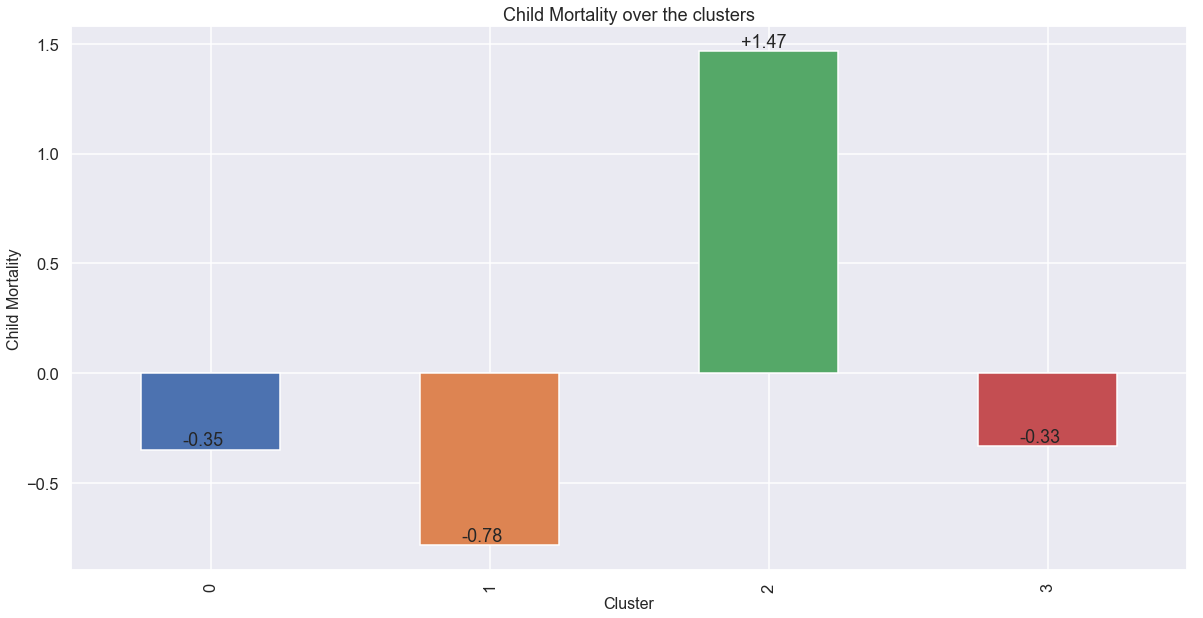

In [104]:
## *** Plotting the bar plot for Child Mortality Rate *** | Start
plotbar(df_PC_feature['Child_Mortality'],'Cluster','Child Mortality','Child Mortality over the clusters')
## *** Plotting the bar plot for Child Mortality Rate *** | End

<center> <b>  The Child Mortality is high in the 3rd Cluster, so we know this is the cluster which we need to look into.</b> </center>

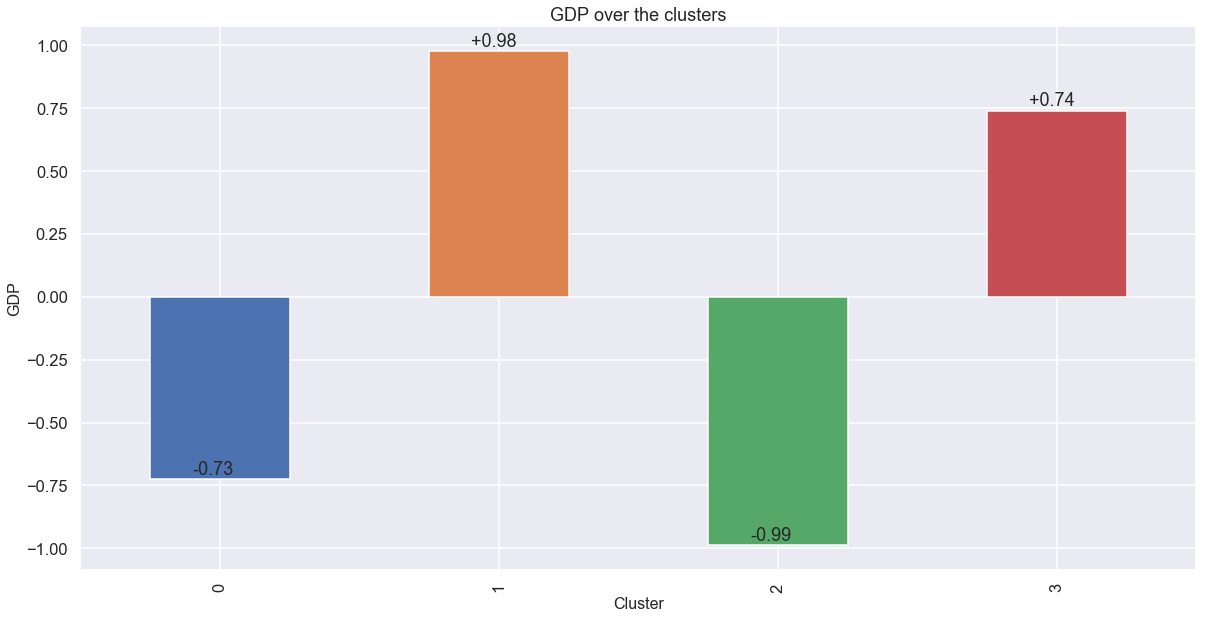

In [105]:
## *** Plotting the bar plot for GDP Rate *** | Start
plotbar(df_PC_feature['GDP'],'Cluster','GDP','GDP over the clusters')
## *** Plotting the bar plot for GDP Rate *** | End

<center> <b>  The GDP is lowest in the 3rd Cluster, so we confirm that this cluster has the countries with low GDP and high Child Mortality rate</b> </center>

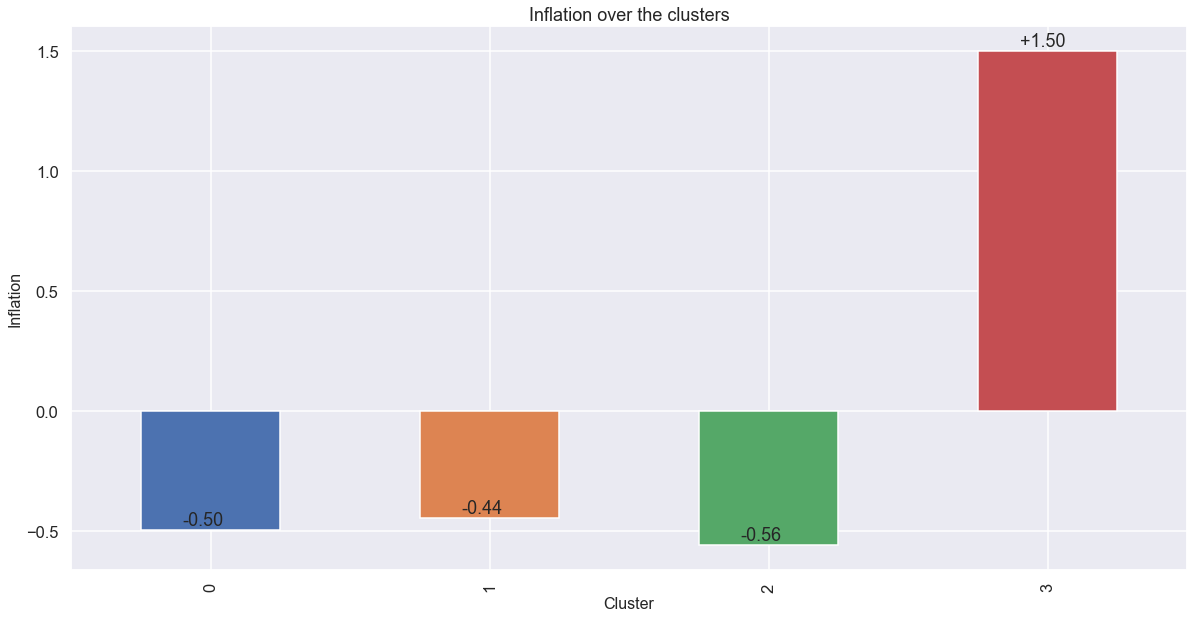

In [106]:
## *** Plotting the bar plot for Inflation Rate *** | Start
plotbar(df_PC_feature['Inflation'],'Cluster','Inflation','Inflation over the clusters')
## *** Plotting the bar plot for Inflation Rate *** | End

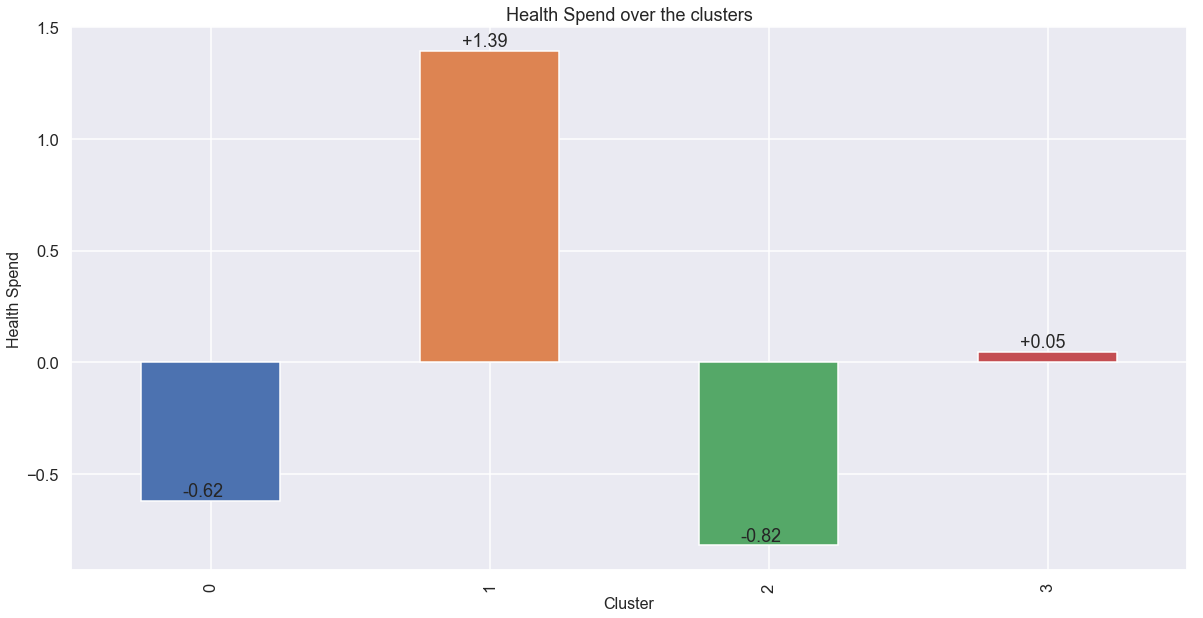

In [107]:
## *** Plotting the bar plot for Health Spend Rate *** | Start
plotbar(df_PC_feature['Health Spend'],'Cluster','Health Spend','Health Spend over the clusters')
## *** Plotting the bar plot for Health Spend Rate *** | End

<center> <b>  The health spend in the countries in 3rd cluster is the lowest also</b> </center>

Text(0.5, 1.0, 'Visialize Income against the Clusters')

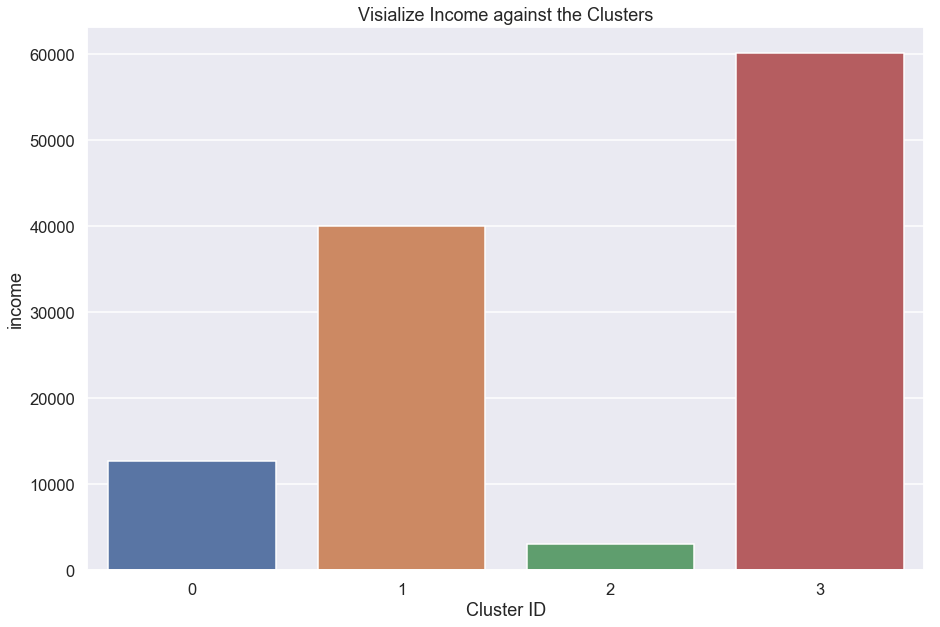

In [108]:
## **** Visualize the Income against the clusters **** | Start
plt.figure(figsize=(15,10))
ax=sns.barplot(df_clust_income.reset_index()['Cluster ID'],y=df_clust_income.reset_index()['income'])
plt.title('Visialize Income against the Clusters')
## **** Visualize the Income against the clusters **** | End

Text(0.5, 1.0, 'Visialize GDP against the Clusters')

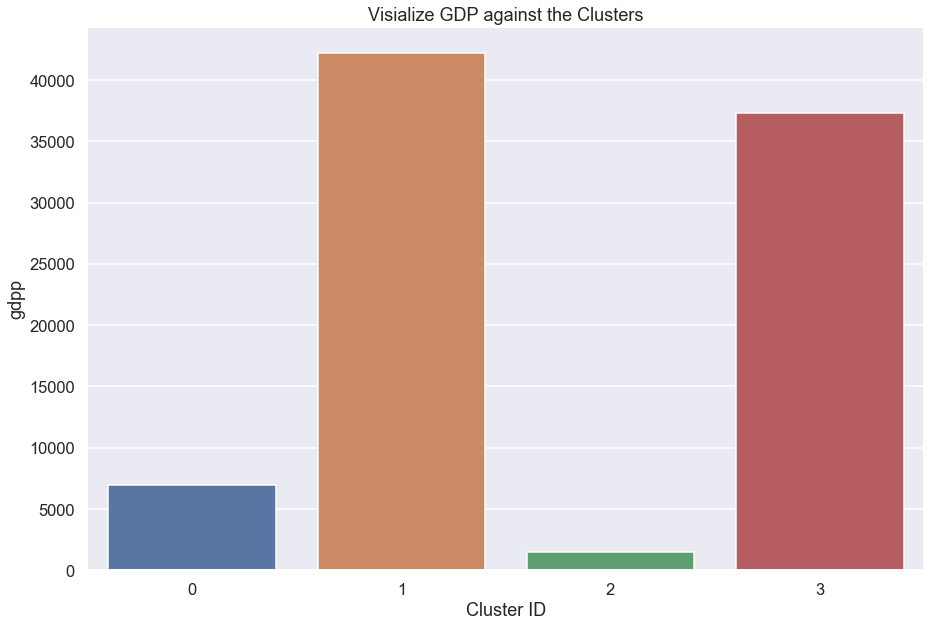

In [109]:
## **** Visualize the GDP against the clusters **** | Start
plt.figure(figsize=(15,10))
ax=sns.barplot(df_clust_life_gdp.reset_index()['Cluster ID'],y=df_clust_life_gdp.reset_index()['gdpp'])
plt.title('Visialize GDP against the Clusters')
## **** Visualize the GDP against the clusters **** | End

In [110]:
## ***** Get the dataset with highest Child Mortality (First 10 countries) ****** #### | Start
df_Clust2=df_pca_k_fit_join[df_pca_k_fit_join['Cluster ID']==2].sort_values('child_mort',ascending=False)
df_Clust1=df_pca_k_fit_join[df_pca_k_fit_join['Cluster ID']==1].sort_values('child_mort',ascending=False)
## ***** Get the dataset with highest Child Mortality (First 10 countries) ****** #### | End

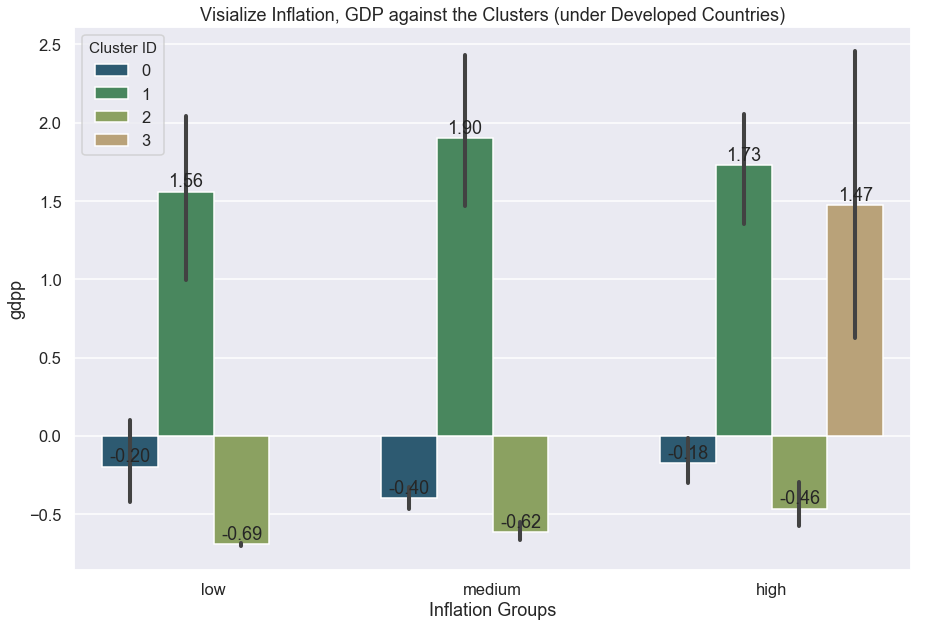

In [111]:
### **** Visualizing Inflation, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='Inflation Groups', y='gdpp', hue='Cluster ID',data=df_pca_k_fit_join,palette=("gist_earth"))
plt.title('Visialize Inflation, GDP against the Clusters (under Developed Countries)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Inflation, GDP against Clusters \ End **** ###

<center> <b> Irrespective of the cluster the GDP is Low accross the Inflation and the 3rd Cluster. The countries with low gdp are the ones which are under-developed and the countries with high GDP are the developed ones, specifically present in 2nd Cluster</b> </center>

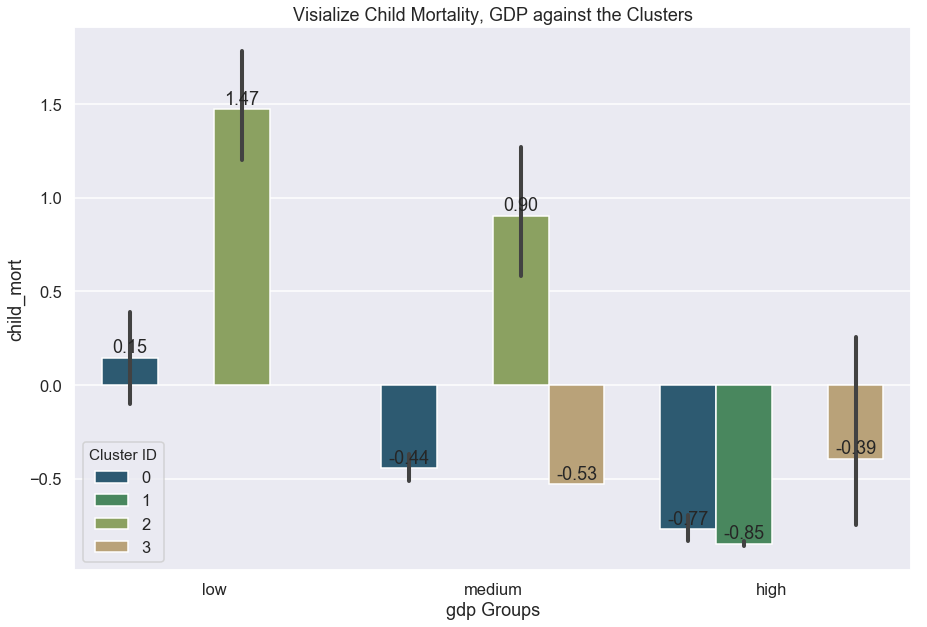

In [112]:
### **** Visualizing Child Mortality, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='child_mort', hue='Cluster ID',data=df_pca_k_fit_join,palette=("gist_earth"))
plt.title('Visialize Child Mortality, GDP against the Clusters')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Child Mortality, GDP against Clusters \ End **** ###

<center><b> We can see that the child mortality is Highest accross 3rd Cluster and with Low/Medium GDP countries. We have seen the same pattern in chart Figure - 19 </b><br>
The high GDP groups which has the developed countries have the lowest Child Mortality Rate</center>

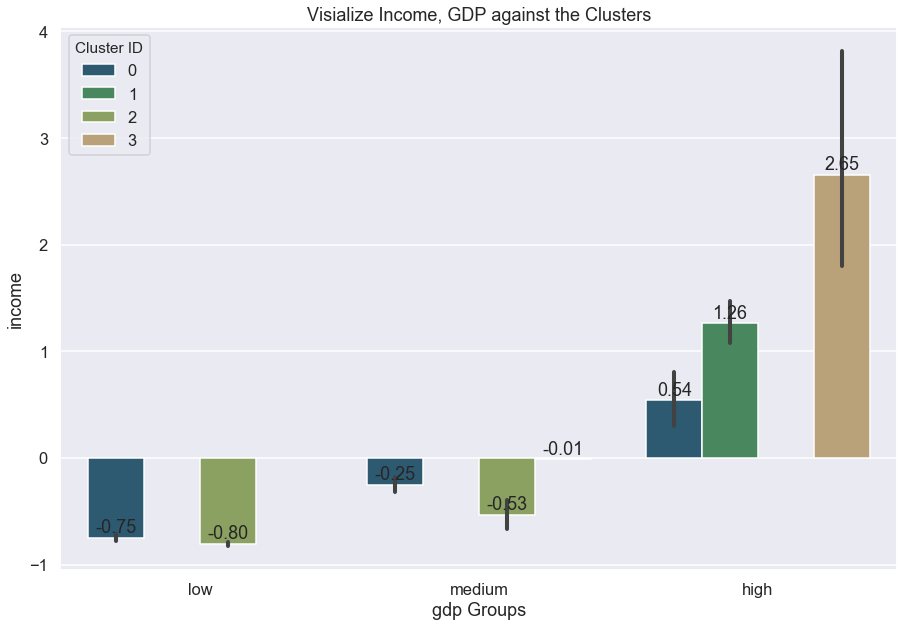

In [113]:
### **** Visualizing Income, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='income', hue='Cluster ID',data=df_pca_k_fit_join,palette=("gist_earth"))
plt.title('Visialize Income, GDP against the Clusters')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Income, GDP against Clusters | End **** ###

<center><b> We can see that the Income is lowest accross 3rd Cluster and with Low/Medium GDP countries. We have seen the same pattern in chart Figure - 19. We can see that the countries with high GDP has the highest incomes also</b> </center>

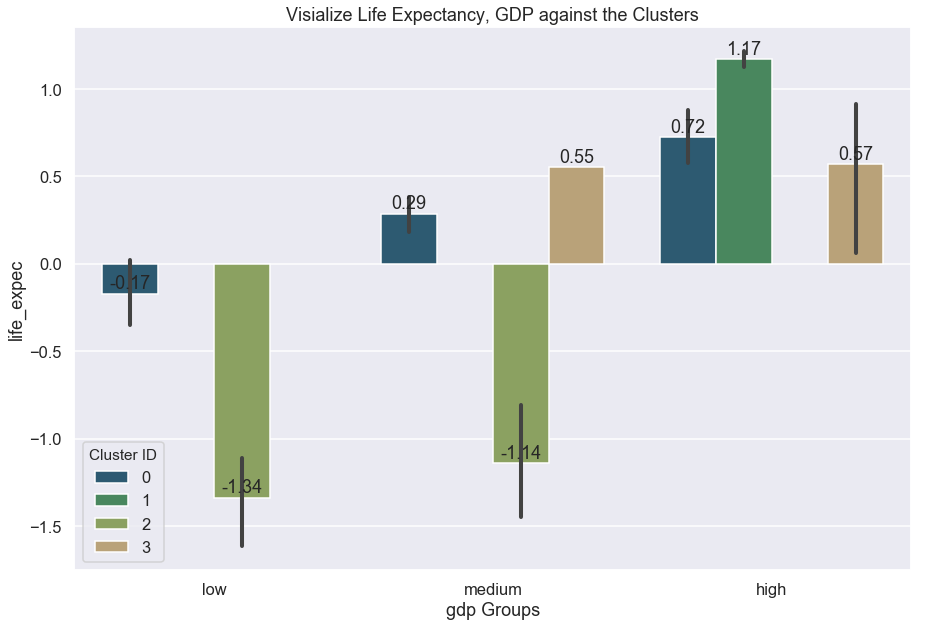

In [114]:
### **** Visualizing Life Expectancy, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='life_expec', hue='Cluster ID',data=df_pca_k_fit_join,palette=("gist_earth"))
plt.title('Visialize Life Expectancy, GDP against the Clusters')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Life Expectancy, GDP against Clusters | End **** ###

<center><b> We can see that the Life Expectancy is lowest accross 3rd Cluster and with Low/Medium GDP countries. We have seen the same pattern in chart Figure - 21. The Life expectancy in the 2nd cluster or the deloped country cluster is the higest </b> </center>

<br> <br> <center> <b> <u> Consolidated Commensts after K Means Clustering with K=4</u> : </b> </center>

<br>
    1.  The countries with <b>low/medium gdp and residing in 3rd Cluster have least life expectancy   </b><br>
    2. The countries with <b>low/medium gdp have the least income in 3rd Cluster </b> <br>
    3. The countries with <b>low gdp have the highest rate in child mortality </b>, the countries with High gdp with High gdp and high income have the least child mortality rate <br>
    4. Accross the Inflation groups, countries residing in 3rd cluster have the least GDPs
 

## Hierarchical Clustering

In [115]:
df_pca_k.head()

,Country,PC1,PC2,PC3
0,Afghanistan,-2.644408,1.575935,-0.249473
1,Albania,-0.163437,-1.435221,-0.092994
2,Algeria,-0.330999,-0.789770,0.373888
3,Angola,-2.417752,2.141078,0.285958
4,Antigua and Barbuda,0.469776,-1.021416,-0.205063


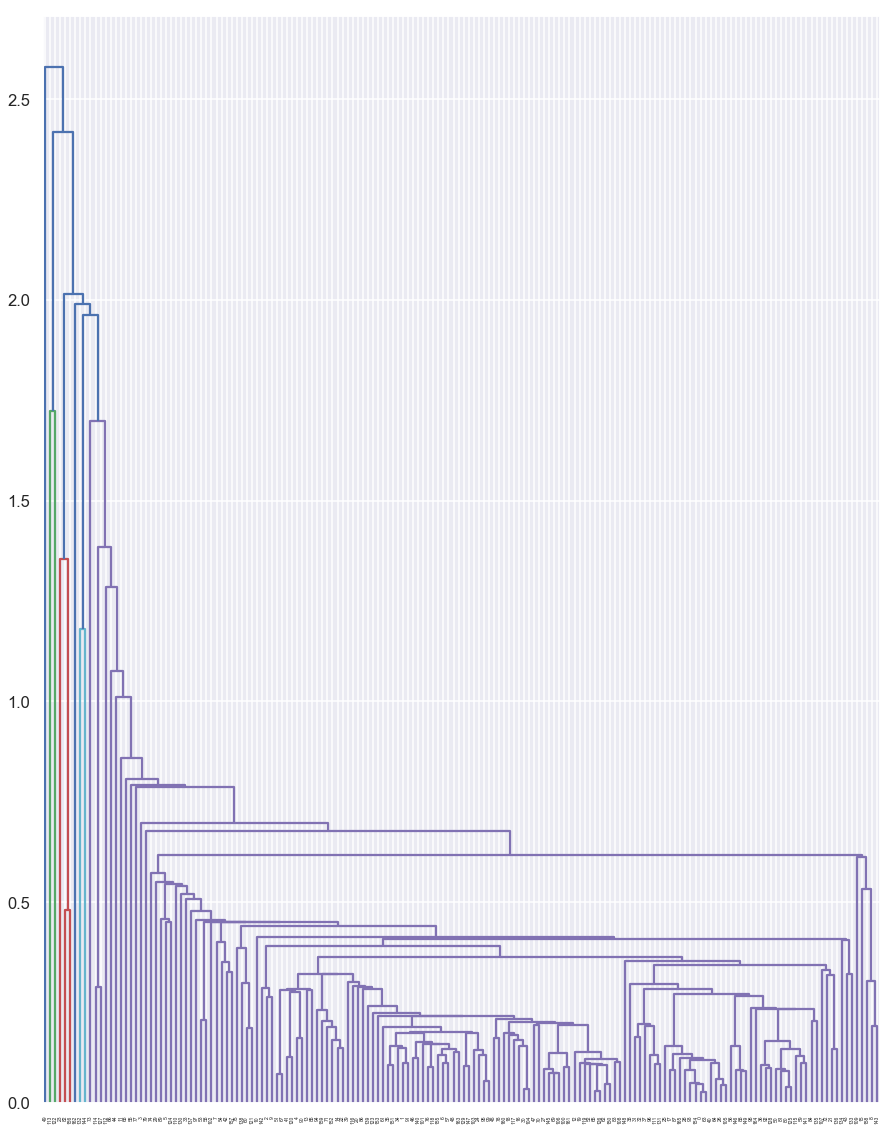

In [116]:
### Create the Hierarchical Clustering - Single Linkage | Start 
plt.figure(figsize=(15,20))
mergings = linkage(df_pca_k.drop('Country',axis=1), method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()
### Create the Hierarchical Clustering | End 

<center> The cluster formation using the Single Lingae is not well formed, so lets try the Complete Linkage method <center>

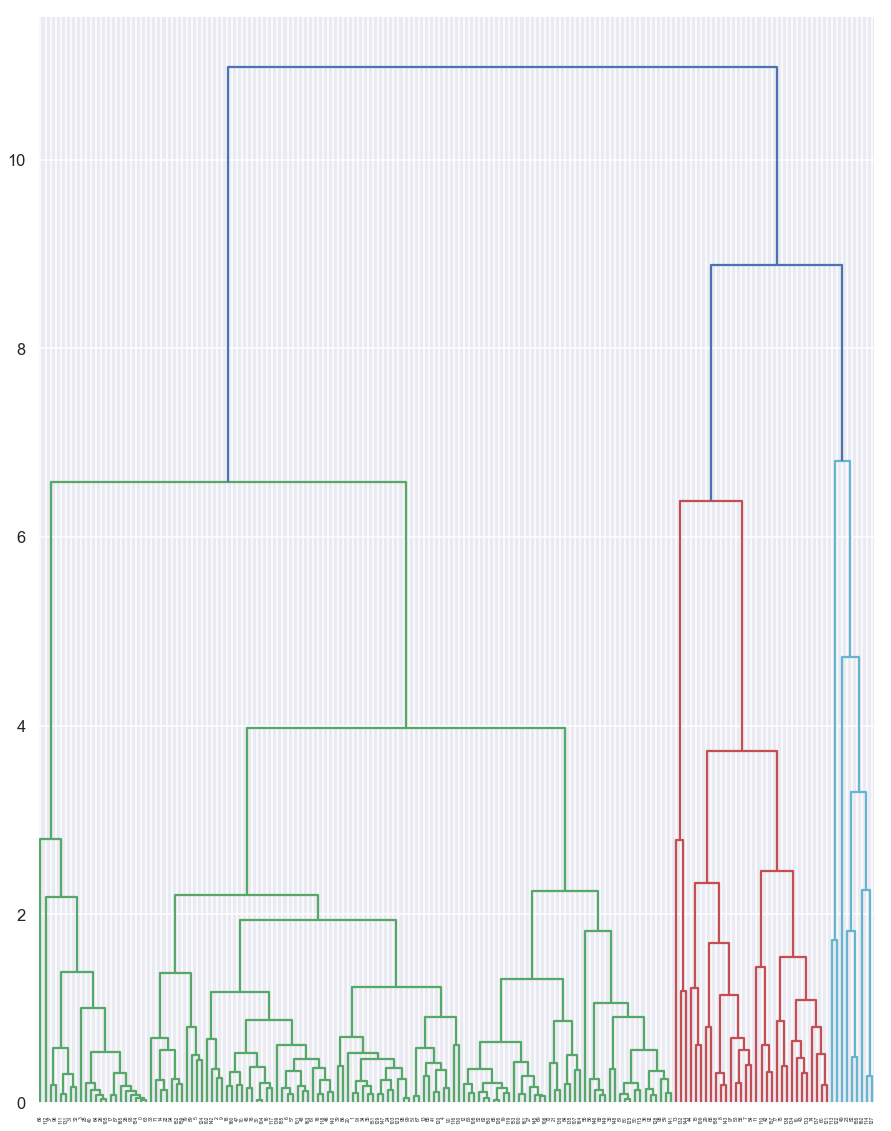

In [117]:
### Create the Hierarchical Clustering - Complete Linkage | Start 
plt.figure(figsize=(15,20))
mergings = linkage(df_pca_k.drop('Country',axis=1), method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()
### Create the Hierarchical Clustering - Complete Linkage | End 

<center> The cluster formation using the Complete Linkage are well formed <center>

In [118]:
## Concat the clusters with the actual data after forming clusters | Start
clusterCutTree = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_h_ct = pd.concat([df_pca_k, clusterCutTree], axis=1)
df_h_ct.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
## Concat the clusters with the actual data after forming clusters| End

In [119]:
df_h_ct.shape

(166, 5)

In [120]:
df_h_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
country      166 non-null object
PC1          166 non-null float64
PC2          166 non-null float64
PC3          166 non-null float64
ClusterID    166 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.6+ KB


In [121]:
### Merge with the actual dataset over country *** | Start
df_pca_h_fit_join= df_h_ct.merge(df, how='inner', left_on='country',right_on='country')
df_pca_h_fit_join
### Merge with the actual dataset over country *** | End

,country,PC1,PC2,PC3,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Income Groups,Inflation Groups,Import Groups,gdp Groups,Exports Groups
0,Afghanistan,-2.644408,1.575935,-0.249473,0,90.2,55.3000,41.9174,248.297,1610,52.2032,56.2,5.82,553,low,low,low,low,low
1,Albania,-0.163437,-1.435221,-0.092994,0,16.6,1145.2000,267.8950,1987.740,9930,183.6410,76.3,1.65,4090,medium,medium,medium,medium,medium
2,Algeria,-0.330999,-0.789770,0.373888,0,27.3,1712.6400,185.9820,1400.440,12900,718.0600,76.5,2.89,4460,medium,high,medium,medium,medium
3,Angola,-2.417752,2.141078,0.285958,0,119.0,2199.1900,100.6050,1514.370,5900,790.7200,60.1,6.16,3530,medium,high,medium,medium,medium
4,Antigua and Barbuda,0.469776,-1.021416,-0.205063,0,10.3,5551.0000,735.6600,7185.800,19100,175.6800,76.8,2.13,12200,medium,medium,medium,medium,medium
5,Argentina,0.469033,-0.663664,1.423488,0,14.5,1946.7000,834.3000,1648.000,18700,2152.7000,75.8,2.37,10300,medium,high,medium,medium,medium
6,Armenia,-0.414160,-1.309265,-0.057693,0,18.1,669.7600,141.6800,1458.660,6700,250.1940,73.3,1.69,3220,medium,medium,medium,medium,medium
7,Australia,3.054935,-0.393867,-0.270333,1,4.8,10276.2000,4530.8700,10847.100,41400,602.0400,82.0,1.93,51900,high,high,high,high,high
8,Austria,3.645918,0.003237,-0.889017,1,4.3,24059.7000,5159.0000,22418.200,43200,409.4370,80.5,1.44,46900,high,medium,high,high,high
9,Azerbaijan,-0.352015,-0.528397,0.403351,0,39.2,3171.1200,343.3920,1208.880,16000,805.9200,69.1,1.92,5840,medium,high,medium,medium,medium


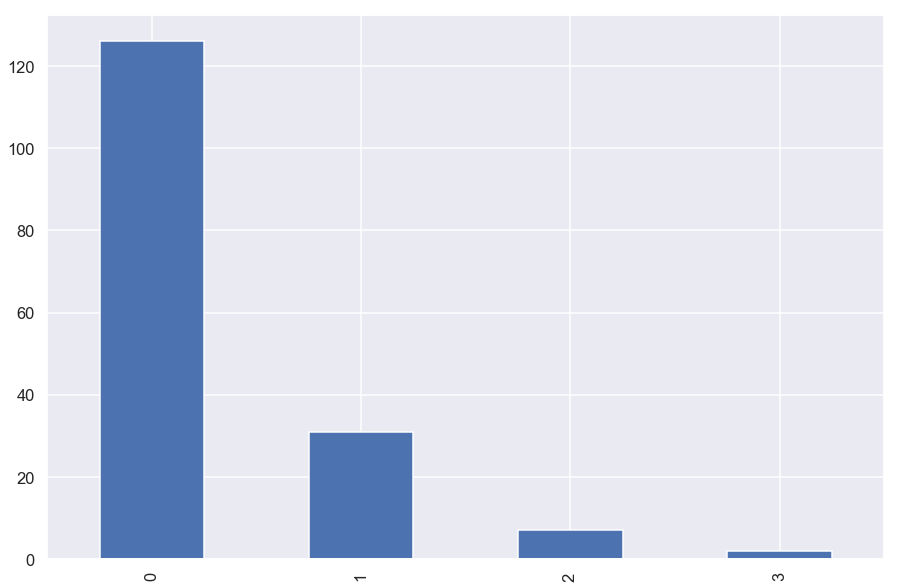

In [122]:
# **** Get the value counts inside each cluster **** | Start
df_pca_h_fit_join['ClusterID'].value_counts()
ax=df_pca_h_fit_join['ClusterID'].value_counts().plot.bar(figsize=(15,10))
# **** Get the value counts inside each cluster **** | End


<center><b> Number of items in various clusters </b></center>

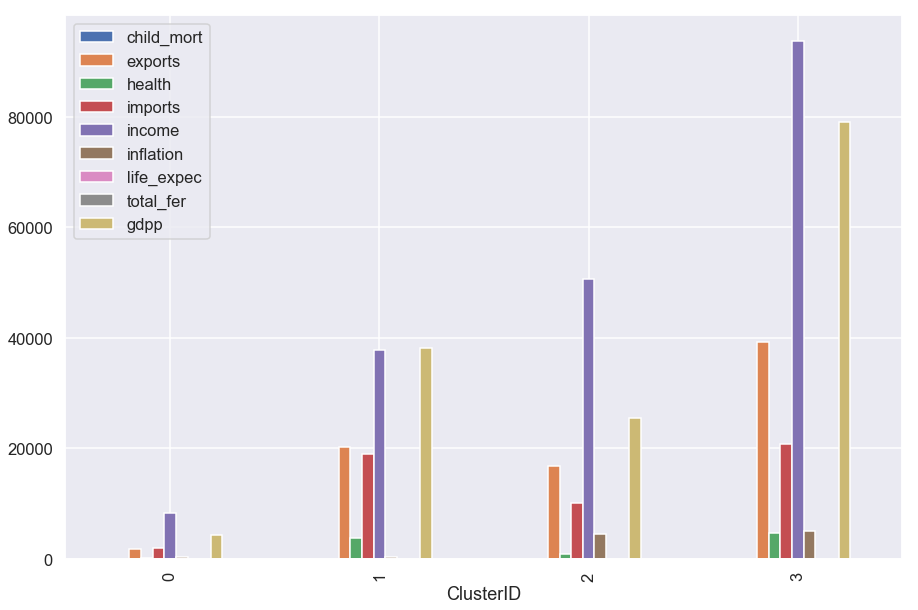

In [123]:
# Visualize the features against the Cluster IDs | Start
df_pca_h_fit_g = df_pca_h_fit_join
df_pca_h_fit_g = df_pca_h_fit_g.drop(['PC1','PC2','PC3'],axis=1)
df_pca_h_fit_gb = df_pca_h_fit_g.groupby('ClusterID').mean()
df_pca_h_fit_gb.plot.bar(figsize=(15,10))
# Visualize the features against the Cluster IDs | End

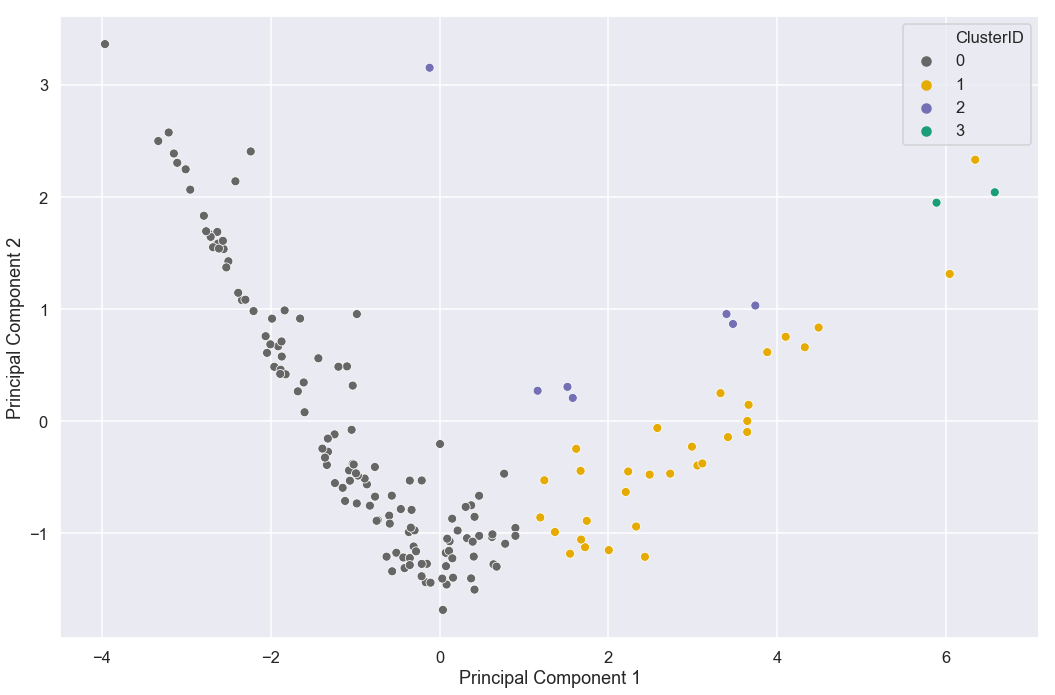

In [124]:
# Plotting the datapoints for each cluster | Start
fig = plt.figure(figsize = (15,10))
sns.scatterplot(df_pca_h_fit_join['PC1'], df_pca_h_fit_join['PC2'], hue=df_pca_h_fit_join['ClusterID'], palette="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# Plotting the datapoints for each cluster | End

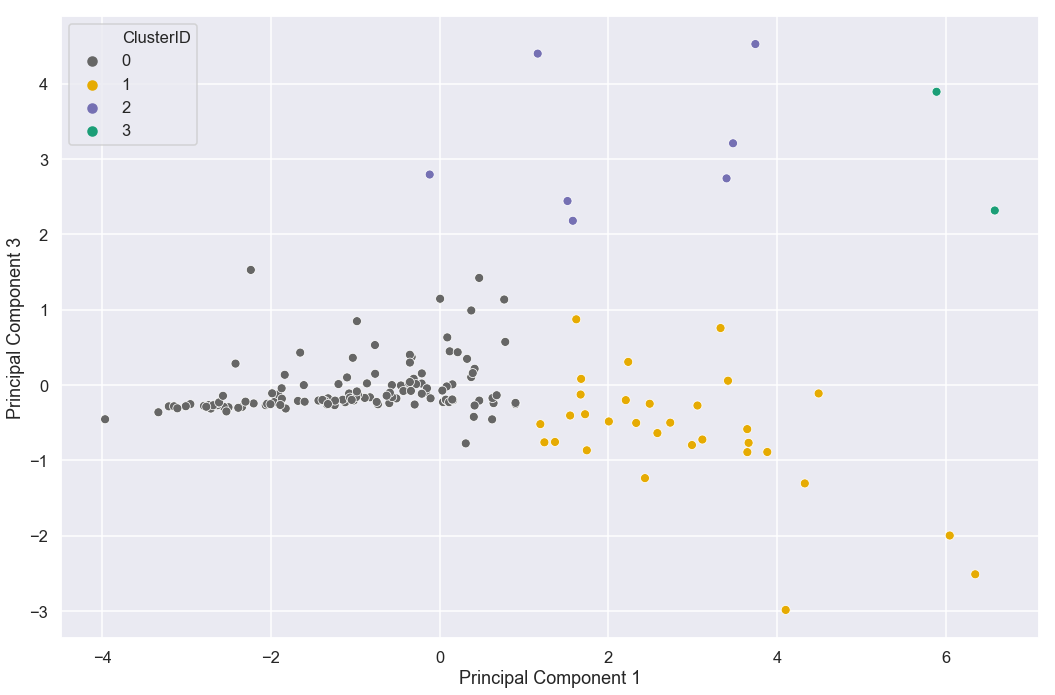

In [125]:
# Plotting the datapoints for each cluster | Start
fig = plt.figure(figsize = (15,10))
sns.scatterplot(df_pca_h_fit_join['PC1'], df_pca_h_fit_join['PC3'], hue=df_pca_h_fit_join['ClusterID'], palette="Dark2_r")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.tight_layout()
plt.show()

# Plotting the datapoints for each cluster | End

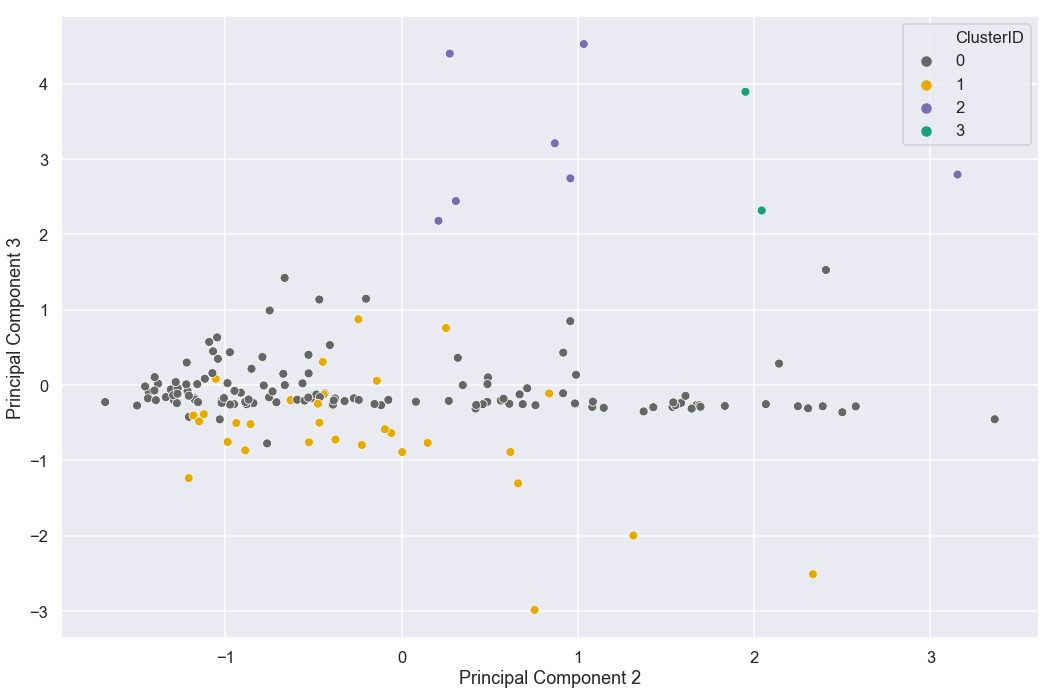

In [126]:
# Plotting the datapoints for each cluster | Start
fig = plt.figure(figsize = (15,10))
sns.scatterplot(df_pca_h_fit_join['PC2'], df_pca_h_fit_join['PC3'], hue=df_pca_h_fit_join['ClusterID'], palette="Dark2_r")
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.tight_layout()
plt.show()

# Plotting the datapoints for each cluster | End

There are some clusters which are well formed but there are some which are not so well formed, which we can expect as we choose to keep the variations and removed only one outlier from the dataset. <br>
<b> Moreover the cluster formation are similar to K-Means Clustering also (we can see the scatter plot of K-Means Clustering above) <b>

In [127]:
##**** Prepare the data with group by over Cluster ID ***** | Start ******
df_h_clust_PC1 = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).PC1.mean())
df_h_clust_PC2 = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).PC2.mean())
df_h_clust_PC3 = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).PC3.mean())
df_h_clust_child_mort = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).child_mort.mean())
df_h_clust_health = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).health.mean())
df_h_clust_total_fer =  pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).total_fer.mean())
df_h_clust_income = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).income.mean())
df_h_clust_life_expec = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).life_expec.mean())
df_h_clust_life_gdp = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).gdpp.mean())
df_h_clust_infl = pd.DataFrame(df_pca_h_fit_join.groupby(["ClusterID"]).inflation.mean())
##**** Prepare the data with group by over Cluster ID ***** | End ******

In [128]:
##**** Prepare the data with PCs ***** | Start ******
df_h_PC_feature = pd.concat([pd.Series([1,2,3,4]),df_h_clust_child_mort,df_h_clust_health,df_h_clust_total_fer,df_h_clust_income,df_h_clust_life_expec,df_h_clust_life_gdp,df_h_clust_infl], axis=1)
df_h_PC_feature.columns = ["ClusterID", "Child_Mortality", "Health Spend", "Total Fertility","Income","Life_Expectancy","Inflation","GDP"]
##**** Prepare the data with PCs ***** | End ******

In [129]:
## Standardize the features as the features were taken from original dataset | Start
df_pca_h_fit_join.child_mort=(df_pca_h_fit_join.child_mort - df_pca_h_fit_join.child_mort.mean())/df_pca_h_fit_join.child_mort.std()
df_pca_h_fit_join.exports=(df_pca_h_fit_join.exports - df_pca_h_fit_join.exports.mean())/df_pca_h_fit_join.exports.std()
df_pca_h_fit_join.health=(df_pca_h_fit_join.health - df_pca_h_fit_join.health.mean())/df_pca_h_fit_join.health.std()
df_pca_h_fit_join.imports=(df_pca_h_fit_join.imports - df_pca_h_fit_join.imports.mean())/df_pca_h_fit_join.imports.std()
df_pca_h_fit_join.income=(df_pca_h_fit_join.income - df_pca_h_fit_join.income.mean())/df_pca_h_fit_join.income.std()
df_pca_h_fit_join.inflation=(df_pca_h_fit_join.inflation - df_pca_h_fit_join.inflation.mean())/df_pca_h_fit_join.inflation.std()
df_pca_h_fit_join.gdpp=(df_pca_h_fit_join.gdpp - df_pca_h_fit_join.gdpp.mean())/df_pca_h_fit_join.gdpp.std()
df_pca_h_fit_join.life_expec=(df_pca_h_fit_join.life_expec - df_pca_h_fit_join.life_expec.mean())/df_pca_h_fit_join.life_expec.std()
df_pca_h_fit_join.total_fer=(df_pca_h_fit_join.total_fer - df_pca_h_fit_join.total_fer.mean())/df_pca_h_fit_join.total_fer.std()
## Standardize the features as the features were taken from original dataset | End


In [130]:
## Standardize the features as the features were taken from original dataset | Start

df_h_PC_feature['Child_Mortality']=(df_h_PC_feature['Child_Mortality'] - df_h_PC_feature['Child_Mortality'].mean())/df_h_PC_feature['Child_Mortality'].std()
df_h_PC_feature['Health Spend']=(df_h_PC_feature['Health Spend'] - df_h_PC_feature['Health Spend'].mean())/df_h_PC_feature['Health Spend'].std()
df_h_PC_feature['Total Fertility']=(df_h_PC_feature['Total Fertility'] - df_h_PC_feature['Total Fertility']/df_h_PC_feature['Total Fertility'])/df_PC_feature['Total Fertility'].std()
df_h_PC_feature['Income']=(df_h_PC_feature['Income'] - df_h_PC_feature['Income'].mean())/df_h_PC_feature['Income'].std()
df_h_PC_feature.Life_Expectancy=(df_h_PC_feature.Life_Expectancy - df_h_PC_feature.Life_Expectancy.mean())/df_h_PC_feature.Life_Expectancy.std()
df_h_PC_feature.GDP=(df_h_PC_feature.GDP - df_h_PC_feature.GDP.mean())/df_h_PC_feature.GDP.std()
df_h_PC_feature.Inflation=(df_h_PC_feature.Inflation - df_h_PC_feature.Inflation.mean())/df_h_PC_feature.Inflation.std()

## Standardize the features as the features were taken from original dataset | End

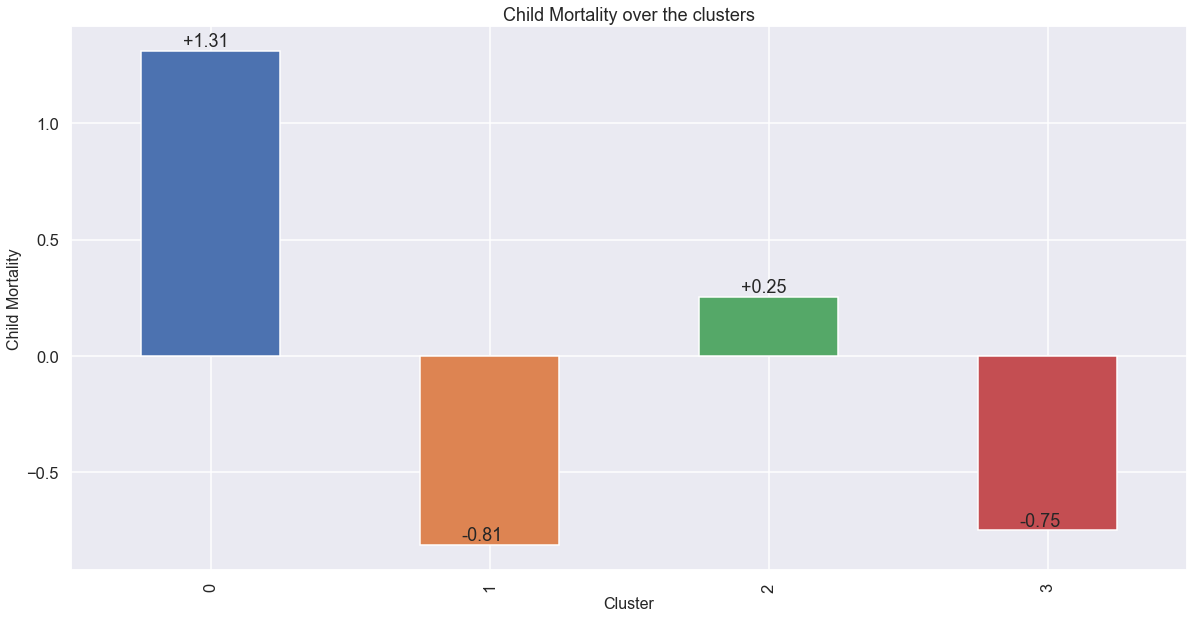

In [131]:
## *** Plotting the bar plot for Child Mortality Rate *** | Start
plotbar(df_h_PC_feature['Child_Mortality'],'Cluster','Child Mortality','Child Mortality over the clusters')
## *** Plotting the bar plot for Child Mortality Rate *** | End

<center> <b>  The Child Mortality is high in the 1st Cluster, so we know this is the cluster which we need to look into.</b> </center>

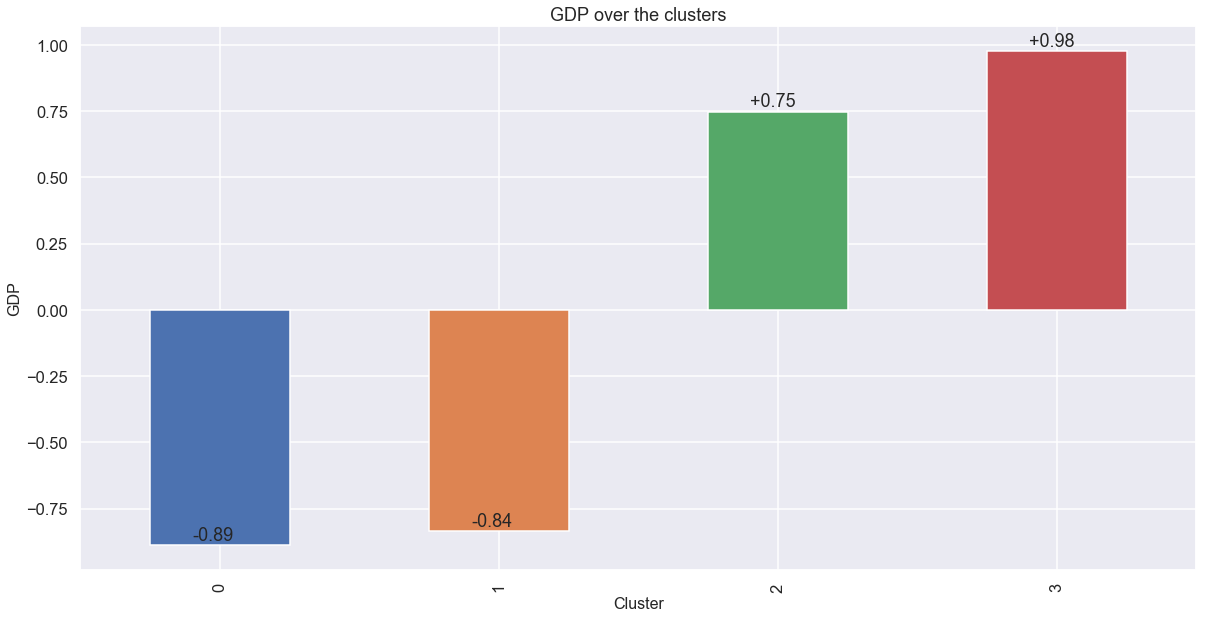

In [132]:
## *** Plotting the bar plot for GDP Rate *** | Start
plotbar(df_h_PC_feature['GDP'],'Cluster','GDP','GDP over the clusters')
## *** Plotting the bar plot for GDP Rate *** | End

<center> <b>  Along with the Child Mortality (which we chdcked earlier) the GDP is also the lowest in 1st Cluster among all the clusters</b> </center>

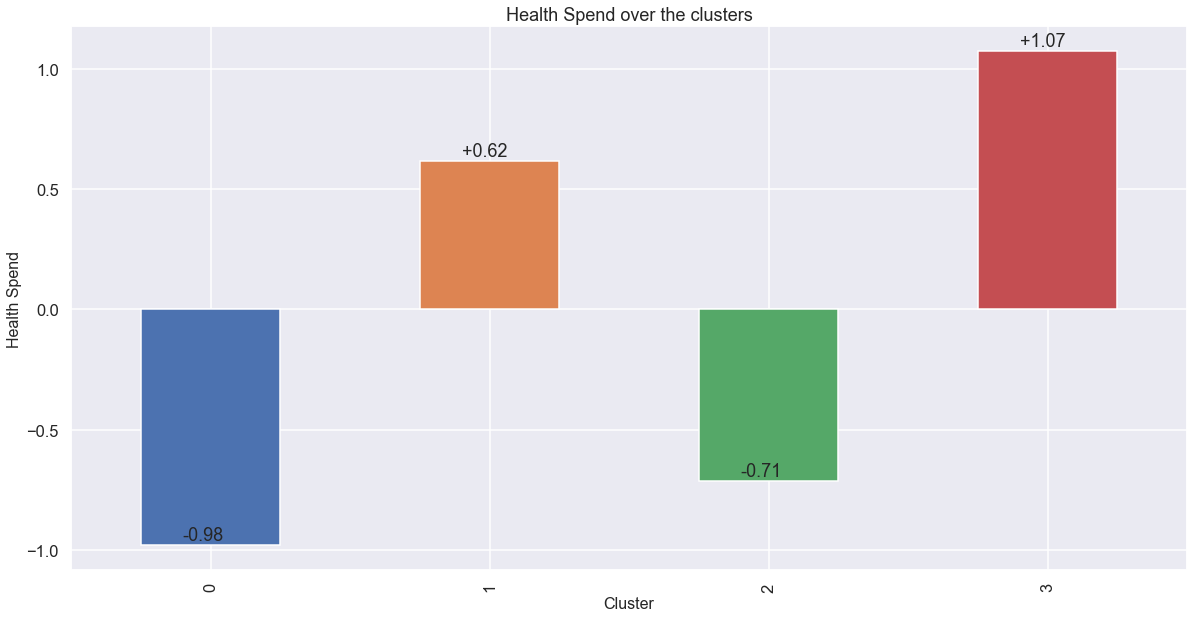

In [133]:
## *** Plotting the bar plot for Health Spend Rate *** | Start
plotbar(df_h_PC_feature['Health Spend'],'Cluster','Health Spend','Health Spend over the clusters')
## *** Plotting the bar plot for Health Spend Rate *** | End

<center> <b>  The health spend in the countries in 1st cluster is the lowest also</b> </center>

In [134]:
## ***** Get the dataset with highest Child Mortality (First 10 countries) ****** #### | Start
df_Clust3=df_pca_h_fit_join[df_pca_h_fit_join['ClusterID']==0].sort_values('child_mort',ascending=False)
## ***** Get the dataset with highest Child Mortality (First 10 countries) ****** #### | End

In [135]:
df_Clust3

,country,PC1,PC2,PC3,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Income Groups,Inflation Groups,Import Groups,gdp Groups,Exports Groups
66,Haiti,-3.962651,3.364705,-0.452650,0,4.200519,-0.537637,-0.563022,-0.547133,-0.824088,-0.470827,-4.323044,0.246939,-0.694256,low,low,low,low,low
131,Sierra Leone,-3.106943,2.305749,-0.307477,0,3.011106,-0.540581,-0.559228,-0.577129,-0.839273,-0.441723,-1.744372,1.481314,-0.709798,low,medium,low,low,low
32,Chad,-3.208073,2.576287,-0.281492,0,2.763311,-0.517977,-0.565994,-0.551067,-0.800768,-0.451836,-1.575463,2.398844,-0.680368,low,low,low,low,low
31,Central African Republic,-3.331588,2.500083,-0.359718,0,2.738532,-0.541818,-0.579301,-0.579138,-0.857278,-0.495073,-2.588915,1.487915,-0.707020,low,low,low,low,low
96,Mali,-3.006927,2.247820,-0.279825,0,2.441179,-0.532470,-0.569120,-0.565689,-0.804022,-0.475423,-1.237646,2.372440,-0.691537,low,low,low,low,low
112,Nigeria,-2.236288,2.407204,1.529682,0,2.267722,-0.495689,-0.520929,-0.549495,-0.626141,1.663693,-1.125040,1.903774,-0.595682,medium,high,low,medium,medium
111,Niger,-3.146675,2.388724,-0.280381,0,2.094266,-0.539702,-0.579181,-0.573702,-0.861292,-0.495154,-1.316470,2.992928,-0.712812,low,low,low,low,low
3,Angola,-2.417752,2.141078,0.285958,0,1.995148,-0.357377,-0.531120,-0.435049,-0.585467,0.203959,-1.170083,2.115004,-0.524765,medium,high,medium,medium,medium
37,"Congo, Dem. Rep.",-2.952898,2.066336,-0.251938,0,1.920810,-0.534545,-0.574260,-0.574239,-0.872409,-0.440968,-1.462858,2.365839,-0.713639,low,medium,low,low,low
25,Burkina Faso,-2.791493,1.833528,-0.275499,0,1.920810,-0.536854,-0.567087,-0.573771,-0.827885,-0.468075,-1.417815,1.923576,-0.699397,low,low,low,low,low


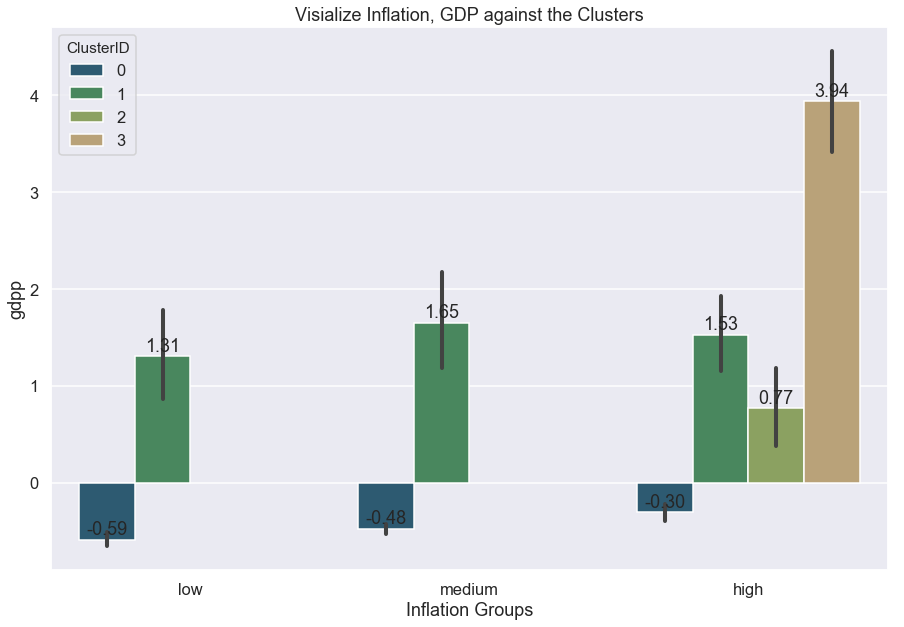

In [136]:
### **** Visualizing Inflation, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='Inflation Groups', y='gdpp', hue='ClusterID',data=df_pca_h_fit_join,palette=("gist_earth"))
plt.title('Visialize Inflation, GDP against the Clusters')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Inflation, GDP against Clusters \ End **** ###

<center> <b> Irrespective of the cluster the GDP is Low accross the Inflation groups and the 1st Cluster </b> </center>

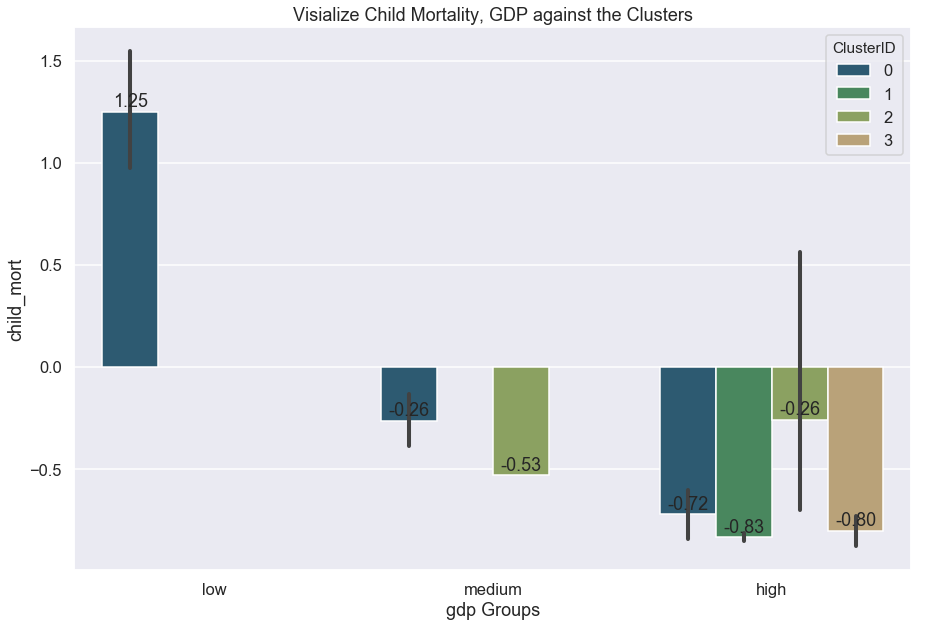

In [137]:
### **** Visualizing Child Mortality, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='child_mort', hue='ClusterID',data=df_pca_h_fit_join,palette=("gist_earth"))
plt.title('Visialize Child Mortality, GDP against the Clusters')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Child Mortality, GDP against Clusters \ End **** ###

<center><b> We can see that the child mortality is Highest accross 1st Cluster and with Low GDP countries. We have seen the same pattern in chart Figure - 19. We have same visualization in K-Means Clustering also </b> </center>

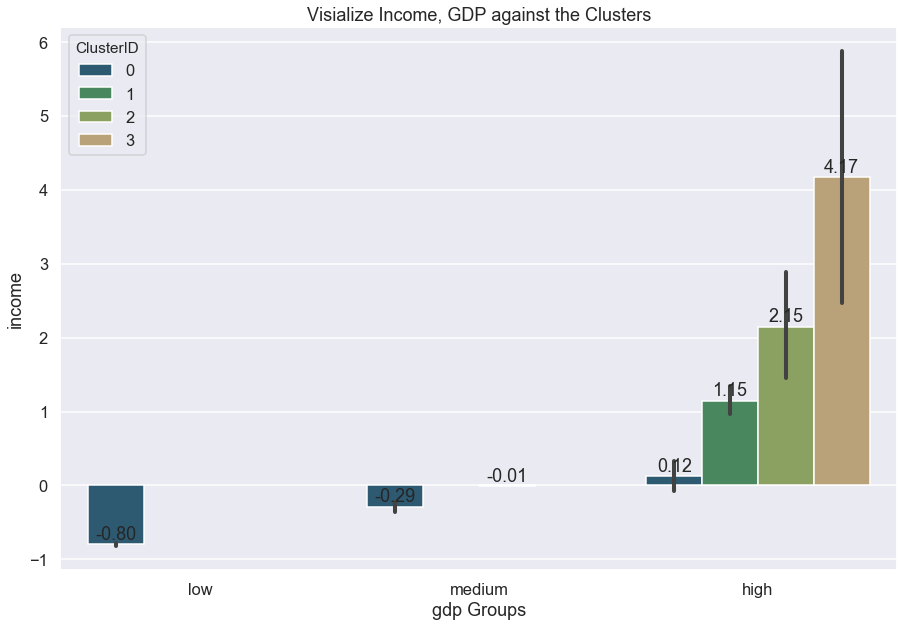

In [138]:
### **** Visualizing Income, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='income', hue='ClusterID',data=df_pca_h_fit_join,palette=("gist_earth"))
plt.title('Visialize Income, GDP against the Clusters')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Income, GDP against Clusters | End **** ###

<center><b> We can see that the Income is lowest accross 1st Cluster and with Low/Medium GDP countries. We have seen the same pattern in chart Figure - 19. We have same visualization in K-Means Clustering also </b> </center>

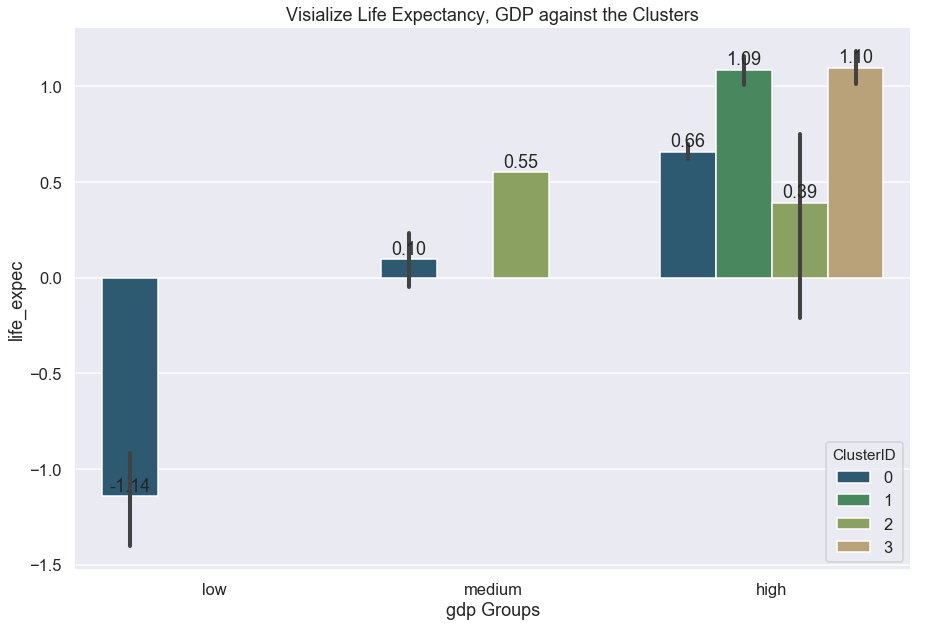

In [139]:
### **** Visualizing Life Expectancy, GDP against Clusters | Start **** ###
plt.figure(figsize=(15,10))
ax=sns.barplot(x='gdp Groups', y='life_expec', hue='ClusterID',data=df_pca_h_fit_join,palette=("gist_earth"))
plt.title('Visialize Life Expectancy, GDP against the Clusters')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()
### **** Visualizing Life Expectancy, GDP against Clusters | End **** ###

<center><b> We can see that the Life Expectancy is lowest in 1st Cluster and with Low GDP countries. We have seen the same pattern in chart Figure - 21. Same was the pattern in the K-Means also</b> </center>

In [140]:
country_aid_h = df_Clust3['country']
country_aid_k = df_Clust2['country']

In [141]:
country_aid_h

66                        Haiti
131                Sierra Leone
32                         Chad
31     Central African Republic
96                         Mali
112                     Nigeria
111                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
64                Guinea-Bissau
40                Cote d'Ivoire
17                        Benin
63                       Guinea
28                     Cameroon
105                  Mozambique
87                      Lesotho
98                   Mauritania
26                      Burundi
115                    Pakistan
93                       Malawi
149                        Togo
0                   Afghanistan
88                      Liberia
36                      Comoros
165                      Zambia
154                      Uganda
56                       Gambia
84                          Lao
141                       Sudan
                 ...           
34      

In [142]:
country_aid_k

66                        Haiti
131                Sierra Leone
32                         Chad
31     Central African Republic
96                         Mali
112                     Nigeria
111                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
64                Guinea-Bissau
40                Cote d'Ivoire
17                        Benin
63                       Guinea
28                     Cameroon
105                  Mozambique
87                      Lesotho
98                   Mauritania
26                      Burundi
115                    Pakistan
93                       Malawi
149                        Togo
0                   Afghanistan
88                      Liberia
36                      Comoros
165                      Zambia
154                      Uganda
56                       Gambia
84                          Lao
141                       Sudan
59                        Ghana
146     

In [143]:
## We take first 10 countries from both the list
print("Countries from Hierarchical Clustering")
print(country_aid_h.head(10))
print("***********************************************")
print("Countries from K Means Clustering")
print(country_aid_k.head(10))

Countries from Hierarchical Clustering
66                        Haiti
131                Sierra Leone
32                         Chad
31     Central African Republic
96                         Mali
112                     Nigeria
111                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object
***********************************************
Countries from K Means Clustering
66                        Haiti
131                Sierra Leone
32                         Chad
31     Central African Republic
96                         Mali
112                     Nigeria
111                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: country, dtype: object


<br> <br> <center> <b> <u> Consolidated Commensts after Hierarchical Clustering with K=4</u> : </b> </center>

<br>
    1.  The countries with <b>low/medium gdp and residing in 1st Cluster have least life expectancy   </b><br>
    2. The countries with <b>low/medium gdp have the least income in 1st Cluster </b> <br>
    3. The countries with <b>low gdp have the highest rate in child mortality </b>, the countries with High gdp with High gdp and high income have the least child mortality rate <br>
    4. Accross the Inflation groups, countries residing in 1st cluster have the least GDPs
 

## <center> Conclusion

The results of the Hirarchical Clustering and K-Means Clustering are different, but the top few countries are same in both the clustering methods.
<br>
<b> <u>Countries from K Means Clustering </u><b><br>
1. Haiti <br>
2. Sierra Leone <br>
3. Chad <br>
4. Central African Republic <br>
5. Mali <br>
6. Nigeria <br>
7. Niger <br>
8. Angola <br>
9. Congo, Dem. Rep. <br>
10. Burkina Faso <br>
<br>
<b> <u>Countries from Hierarchical Clustering </u><b><br>
1. Haiti <br>
2. Sierra Leone <br>
3. Chad <br>
4. Central African Republic <br>
5. Mali <br>
6. Nigeria <br>
7. Niger <br>
8. Angola <br>
9. Congo, Dem. Rep. <br>
10. Burkina Faso <br>

 <br> The above countries have 
 1. Low GDP, 
 2. Low Income, 
 3. Low Life Expectancy and 
 4. High Child Mortality rate
 <br><br> We would recommend the above countries for the funding !!! 